In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


plt.rcParams.update({"figure.max_open_warning": 0})

DATA_PATH = "/content/final_trade_dataset.csv"
OUTPUT_DIR = "output_reports"
PLOTS_DIR = "plots"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)

print("Setup complete.")

Setup complete.


In [2]:
from google.colab import files
uploaded = files.upload()


Saving final_trade_dataset.csv to final_trade_dataset.csv


In [3]:
import pandas as pd
df = pd.read_csv('final_trade_dataset.csv')
df.head()

,Country,series,Year,Value,Source,Exports (current US$),Imports (current US$),Current Account Balance (US$),NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.MKTP.KD.ZG,SH.XPD.CHEX.GD.ZS
0,ABW,NaN,2000,NaN,IMF,1.393587e+09,1.324285e+09,2.071453e+08,1.393587e+09,1.324285e+09,1.873453e+09,NaN,NaN,NaN,NaN
1,ABW,NaN,2001,NaN,IMF,1.346423e+09,1.316034e+09,3.087598e+08,1.346423e+09,1.316034e+09,1.896457e+09,NaN,NaN,NaN,NaN
2,ABW,NaN,2002,NaN,IMF,1.266651e+09,1.347128e+09,-3.402514e+08,1.266651e+09,1.347128e+09,1.961844e+09,NaN,NaN,NaN,NaN
3,ABW,NaN,2003,NaN,IMF,1.282296e+09,1.432168e+09,-1.655531e+08,1.282296e+09,1.432168e+09,2.044112e+09,NaN,NaN,NaN,NaN
4,ABW,NaN,2004,NaN,IMF,1.458099e+09,1.527994e+09,2.708883e+08,1.458099e+09,1.527994e+09,2.254831e+09,NaN,NaN,NaN,NaN


Dataset Loading

In [4]:
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
display(df.head(10))
print("\nDtypes:\n", df.dtypes)

Shape: (6384, 15)

Columns: ['Country', 'series', 'Year', 'Value', 'Source', 'Exports (current US$)', 'Imports (current US$)', 'Current Account Balance (US$)', 'NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.KD.ZG', 'SH.XPD.CHEX.GD.ZS']


,Country,series,Year,Value,Source,Exports (current US$),Imports (current US$),Current Account Balance (US$),NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.MKTP.KD.ZG,SH.XPD.CHEX.GD.ZS
0,ABW,NaN,2000,NaN,IMF,1.393587e+09,1.324285e+09,2.071453e+08,1.393587e+09,1.324285e+09,1.873453e+09,NaN,NaN,NaN,NaN
1,ABW,NaN,2001,NaN,IMF,1.346423e+09,1.316034e+09,3.087598e+08,1.346423e+09,1.316034e+09,1.896457e+09,NaN,NaN,NaN,NaN
2,ABW,NaN,2002,NaN,IMF,1.266651e+09,1.347128e+09,-3.402514e+08,1.266651e+09,1.347128e+09,1.961844e+09,NaN,NaN,NaN,NaN
3,ABW,NaN,2003,NaN,IMF,1.282296e+09,1.432168e+09,-1.655531e+08,1.282296e+09,1.432168e+09,2.044112e+09,NaN,NaN,NaN,NaN
4,ABW,NaN,2004,NaN,IMF,1.458099e+09,1.527994e+09,2.708883e+08,1.458099e+09,1.527994e+09,2.254831e+09,NaN,NaN,NaN,NaN
5,ABW,NaN,2005,NaN,IMF,1.606589e+09,1.816623e+09,1.049635e+08,1.606589e+09,1.816623e+09,2.360017e+09,NaN,NaN,NaN,NaN
6,ABW,NaN,2006,NaN,IMF,1.595335e+09,1.888111e+09,3.105557e+08,1.595335e+09,1.888111e+09,2.469783e+09,NaN,NaN,NaN,NaN
7,ABW,NaN,2007,NaN,IMF,1.742107e+09,2.005849e+09,2.582682e+08,1.742107e+09,2.005849e+09,2.677641e+09,NaN,NaN,NaN,NaN
8,ABW,NaN,2008,NaN,IMF,1.863014e+09,2.091922e+09,1.117318e+05,1.863014e+09,2.091922e+09,2.843025e+09,NaN,NaN,NaN,NaN
9,ABW,NaN,2009,NaN,IMF,1.606810e+09,1.906101e+09,1.716760e+08,1.606810e+09,1.906101e+09,2.553793e+09,NaN,NaN,NaN,NaN



Dtypes:
 Country                           object
series                           float64
Year                               int64
Value                            float64
Source                            object
Exports (current US$)            float64
Imports (current US$)            float64
Current Account Balance (US$)    float64
NE.EXP.GNFS.CD                   float64
NE.IMP.GNFS.CD                   float64
NY.GDP.MKTP.CD                   float64
NE.EXP.GNFS.ZS                   float64
NE.IMP.GNFS.ZS                   float64
NY.GDP.MKTP.KD.ZG                float64
SH.XPD.CHEX.GD.ZS                float64
dtype: object


Missing Data Summary

In [5]:
missing_counts = df.isnull().sum()
missing_pct = 100 * missing_counts / len(df)
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

n_duplicates = int(df.duplicated().sum())

print("Number of rows:", len(df))
print("Number of duplicate rows:", n_duplicates)
display(missing_summary)

Number of rows: 6384
Number of duplicate rows: 0


,missing_count,missing_pct
series,6384,100.000000
Value,6384,100.000000
SH.XPD.CHEX.GD.ZS,4449,69.689850
NE.EXP.GNFS.ZS,4353,68.186090
NE.IMP.GNFS.ZS,4335,67.904135
NY.GDP.MKTP.KD.ZG,4078,63.878446
Current Account Balance (US$),2117,33.161028
Exports (current US$),1038,16.259398
NE.EXP.GNFS.CD,1038,16.259398
NE.IMP.GNFS.CD,989,15.491855


Handling missing Values

In [6]:

# - Drops exact duplicates, then normalizes string columns by trimming whitespace and converting empty strings to NaN so missingness is consistent.

# drop exact duplicates and report how many removed
before = len(df)
df = df.drop_duplicates(keep="first")
after = len(df)
print(f"Duplicates removed: {before - after}")

# Basic normalization of object/string columns
obj_cols = df.select_dtypes(include="object").columns.tolist()
for c in obj_cols:
    # strip leading/trailing whitespace and convert empty strings to NaN
    df[c] = df[c].astype(str).str.strip().replace({"": np.nan, "nan": np.nan})

# Recompute missing summary after these operations
missing_counts_after = df.isnull().sum()
missing_pct_after = 100 * missing_counts_after / len(df)
pd.DataFrame({"missing_count": missing_counts_after, "missing_pct": missing_pct_after}).sort_values("missing_pct", ascending=False).head(10)


Duplicates removed: 0


,missing_count,missing_pct
series,6384,100.000000
Value,6384,100.000000
SH.XPD.CHEX.GD.ZS,4449,69.689850
NE.EXP.GNFS.ZS,4353,68.186090
NE.IMP.GNFS.ZS,4335,67.904135
NY.GDP.MKTP.KD.ZG,4078,63.878446
Current Account Balance (US$),2117,33.161028
Exports (current US$),1038,16.259398
NE.EXP.GNFS.CD,1038,16.259398
NE.IMP.GNFS.CD,989,15.491855


Column Type Detection

In [7]:
def detect_column_types(df, cat_frac_threshold=0.05, cardinality_threshold=50):
    n = len(df)
    types = {}
    for col in df.columns:
        ser = df[col]

        if pd.api.types.is_datetime64_any_dtype(ser):
            types[col] = "datetime"
            continue

        if ser.dtype == "object":
            parsed = pd.to_datetime(ser, errors="coerce")
            if parsed.notnull().sum() / max(1, n) > 0.5:
                types[col] = "datetime"
                continue
        if pd.api.types.is_numeric_dtype(ser):
            unique_frac = ser.nunique(dropna=True) / max(1, n)
            if unique_frac <= cat_frac_threshold or ser.nunique() <= cardinality_threshold:
                types[col] = "categorical"
            else:
                types[col] = "numeric"
        elif pd.api.types.is_bool_dtype(ser):
            types[col] = "categorical"
        elif ser.dtype == "object":
            avg_len = ser.dropna().astype(str).str.len().mean() if ser.dropna().size else 0
            if ser.nunique(dropna=True) / max(1, n) <= cat_frac_threshold or ser.nunique() <= cardinality_threshold:
                types[col] = "categorical"
            elif avg_len > 100:
                types[col] = "text"
            else:
                types[col] = "categorical"
        else:
            types[col] = "other"
    return types

types = detect_column_types(df)
pd.Series(types, name="detected_type").to_csv(os.path.join(OUTPUT_DIR, "detected_column_types.csv"))
print("Detected column types (sample):")
display(pd.Series(types).head(50))

numeric_cols = [c for c, t in types.items() if t == "numeric"]
cat_cols = [c for c, t in types.items() if t == "categorical"]
datetime_cols = [c for c, t in types.items() if t == "datetime"]
text_cols = [c for c, t in types.items() if t == "text"]

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)
print("Datetime columns:", datetime_cols)
print("Text columns:", text_cols)

Detected column types (sample):


/tmp/ipython-input-4007649020.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(ser, errors="coerce")


,0
Country,categorical
series,categorical
Year,categorical
Value,categorical
Source,categorical
Exports (current US$),numeric
Imports (current US$),numeric
Current Account Balance (US$),numeric
NE.EXP.GNFS.CD,numeric
NE.IMP.GNFS.CD,numeric



Numeric columns: ['Exports (current US$)', 'Imports (current US$)', 'Current Account Balance (US$)', 'NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.KD.ZG', 'SH.XPD.CHEX.GD.ZS']
Categorical columns: ['Country', 'series', 'Year', 'Value', 'Source']
Datetime columns: []
Text columns: []


Missing Value Implementation:


For numeric: median imputation.

For categorical: most frequent (mode).

In [8]:


import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# Use the df from earlier cells (assumes df exists)
working_df = df.copy()           # original (after duplicates removal & normalization)
print("Starting shape:", working_df.shape)

# 1) Normalize string-only "empty" values to actual NaN (strip whitespace)
obj_cols = working_df.select_dtypes(include="object").columns.tolist()
for c in obj_cols:

    working_df[c] = working_df[c].astype(object).where(~working_df[c].astype(str).str.strip().eq(""), np.nan)

# 2) Find columns that are 100% missing (all NaN)
all_missing_cols = [c for c in working_df.columns if working_df[c].isna().all()]
print(f"Columns with 100% missing values ({len(all_missing_cols)}):", all_missing_cols)

pd.Series(all_missing_cols, name="dropped_100pct_missing").to_csv(os.path.join(OUTPUT_DIR, "dropped_100pct_missing_columns.csv"), index=False)

# 3) Drop those columns
if all_missing_cols:
    working_df.drop(columns=all_missing_cols, inplace=True)
    print("Dropped columns with 100% missing values. New shape:", working_df.shape)
else:
    print("No fully-empty columns to drop.")

# 4) Re-detect numeric and categorical columns (after dropping)

def detect_numeric_and_categorical(df):
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical = [c for c in df.columns if c not in numeric]
    return numeric, categorical

numeric_cols_post, cat_cols_post = detect_numeric_and_categorical(working_df)
print("\nNumeric columns (post-drop):", numeric_cols_post)
print("Categorical / other columns (post-drop):", cat_cols_post)

# 5) Impute numeric columns (median) if any exist
df_imputed = working_df.copy()
if numeric_cols_post:
    num_imp = SimpleImputer(strategy="median")
    df_imputed[numeric_cols_post] = num_imp.fit_transform(df_imputed[numeric_cols_post])
    print("Numeric columns imputed with median.")
else:
    print("No numeric columns to impute.")

# 6) Impute categorical columns (most_frequent) but skip any category columns that still have no observed values

cat_cols_to_impute = []
cat_cols_skipped = []
for c in cat_cols_post:
    # if there exists at least one non-null after previous operations -> impute it
    if df_imputed[c].notna().any():
        cat_cols_to_impute.append(c)
    else:
        cat_cols_skipped.append(c)

print(f"Categorical columns to impute: {len(cat_cols_to_impute)}; skipped (still empty): {len(cat_cols_skipped)}")
if cat_cols_skipped:
    print("Skipped categorical (no observed values):", cat_cols_skipped)

    pd.Series(cat_cols_skipped, name="skipped_empty_categorical_columns").to_csv(
        os.path.join(OUTPUT_DIR, "skipped_empty_categorical_columns.csv"), index=False
    )

if cat_cols_to_impute:
    cat_imp = SimpleImputer(strategy="most_frequent", fill_value="missing")
    df_imputed[cat_cols_to_impute] = cat_imp.fit_transform(df_imputed[cat_cols_to_impute])
    print("Categorical columns imputed with most frequent value.")
else:
    print("No categorical columns to impute.")

# 7) Save imputed dataset and print final shape
df_imputed.to_csv(os.path.join(OUTPUT_DIR, "cleaned_imputed_data.csv"), index=False)
print("Imputed dataset saved to", os.path.join(OUTPUT_DIR, "cleaned_imputed_data.csv"))
print("Final shape after imputation:", df_imputed.shape)


Starting shape: (6384, 15)
Columns with 100% missing values (2): ['series', 'Value']
Dropped columns with 100% missing values. New shape: (6384, 13)

Numeric columns (post-drop): ['Year', 'Exports (current US$)', 'Imports (current US$)', 'Current Account Balance (US$)', 'NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.KD.ZG', 'SH.XPD.CHEX.GD.ZS']
Categorical / other columns (post-drop): ['Country', 'Source']
Numeric columns imputed with median.
Categorical columns to impute: 2; skipped (still empty): 0
Categorical columns imputed with most frequent value.
Imputed dataset saved to output_reports/cleaned_imputed_data.csv
Final shape after imputation: (6384, 13)


Outlier Detection
using two methods:
 1) IQR-based (commonly used)
 2) Z-score (statistical distance from mean

In [9]:
def detect_outliers_iqr(df, cols, multiplier=1.5):
    out_idx = set()
    for c in cols:
        ser = df[c].dropna()
        q1 = ser.quantile(0.25)
        q3 = ser.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - multiplier * iqr
        upper = q3 + multiplier * iqr
        idx = df[(df[c] < lower) | (df[c] > upper)].index
        out_idx.update(idx.tolist())
    return sorted(out_idx)

def detect_outliers_zscore(df, cols, z_thresh=3.0):
    out_idx = set()
    for c in cols:
        ser = df[c]
        if ser.dropna().empty:
            continue

        ser_numeric = pd.to_numeric(ser, errors='coerce').dropna()
        if ser_numeric.empty:
            continue
        z = np.abs(stats.zscore(ser_numeric))
        idx = ser_numeric.index[z > z_thresh]
        out_idx.update(idx.tolist())
    return sorted(out_idx)


outliers_iqr = detect_outliers_iqr(df_imputed, numeric_cols_post)
outliers_z = detect_outliers_zscore(df_imputed, numeric_cols_post)

print("IQR outlier count:", len(outliers_iqr))
print("Z-score outlier count:", len(outliers_z))


pd.DataFrame({"iqr_outlier_index": outliers_iqr}).to_csv(os.path.join(OUTPUT_DIR, "outliers_iqr.csv"), index=False)
pd.DataFrame({"z_outlier_index": outliers_z}).to_csv(os.path.join(OUTPUT_DIR, "outliers_zscore.csv"), index=False)
print("Outlier indices saved in output_reports/")


flagged_idx = sorted(set(outliers_iqr[:10] + outliers_z[:10]))
if flagged_idx:

    valid_flagged_idx = [idx for idx in flagged_idx if idx in df_imputed.index]
    if valid_flagged_idx:
        display(df_imputed.loc[valid_flagged_idx].head(10))
    else:
        print("No valid outlier indices to display.")
else:
    print("No outliers flagged by these methods (on numeric columns).")

IQR outlier count: 3969
Z-score outlier count: 595
Outlier indices saved in output_reports/


,Country,Year,Source,Exports (current US$),Imports (current US$),Current Account Balance (US$),NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.MKTP.KD.ZG,SH.XPD.CHEX.GD.ZS
15,ABW,2015.0,IMF,2.158564e+09,2.162352e+09,1.183427e+08,2.158564e+09,2.162352e+09,2.962907e+09,72.852913,72.980750,-0.623626,6.006020
16,ABW,2016.0,IMF,2.142860e+09,2.101056e+09,1.411790e+08,2.142860e+09,2.101056e+09,2.983635e+09,71.820435,70.419328,1.719625,6.006020
17,ABW,2017.0,IMF,2.243517e+09,2.203529e+09,3.462888e+07,2.243517e+09,2.203529e+09,3.092429e+09,72.548690,71.255606,7.048533,6.006020
18,ABW,2018.0,IMF,2.367134e+09,2.390330e+09,-1.937428e+07,2.367134e+09,2.390330e+09,3.276184e+09,72.252774,72.960778,2.397086,6.006020
19,ABW,2019.0,IMF,2.486899e+09,2.448676e+09,8.479682e+07,2.486899e+09,2.448676e+09,3.395799e+09,73.234592,72.108981,-2.232442,6.006020
20,ABW,2020.0,IMF,1.315201e+09,1.765709e+09,-3.164555e+08,1.315201e+09,1.765709e+09,2.481857e+09,52.992604,71.144663,-26.211820,6.006020
21,ABW,2021.0,IMF,2.072292e+09,2.234451e+09,7.925707e+07,2.072292e+09,2.234451e+09,2.929447e+09,70.740044,76.275533,24.132627,6.006020
22,ABW,2022.0,IMF,2.871730e+09,2.797736e+09,2.305558e+08,2.871730e+09,2.797736e+09,3.279344e+09,87.570280,85.313891,8.517918,6.006020
23,ABW,2023.0,IMF,3.223288e+09,2.971927e+09,1.944984e+08,3.223288e+09,2.971927e+09,3.648573e+09,88.343786,81.454496,4.263719,6.006020
39,AFE,2015.0,IMF,2.162466e+11,2.776934e+11,-2.109244e+08,2.162466e+11,2.776934e+11,8.983089e+11,24.072632,30.912906,3.003367,5.971391


Data type conversions & transformations

Converts any detected datetime columns to pandas datetime dtype.

For numeric columns with high positive skew (>1), applies log1p to reduce skewness.

Standardizes all numeric columns (zero mean, unit variance) and stores in a separate df.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import os


df_transformed = df_imputed.copy()


for c in datetime_cols:
    try:
        df_transformed[c] = pd.to_datetime(df_transformed[c], errors="coerce")
        print(f"Converted {c} to datetime.")
    except Exception as e:
        print(f"Failed to convert {c} to datetime: {e}")


skewed = []
for c in numeric_cols:
    if df_transformed[c].dropna().shape[0] < 5:
        continue
    sk = df_transformed[c].skew()
    if abs(sk) > 1:  # heuristic threshold

        if (df_transformed[c] >= -0.9).all():
            df_transformed[c + "_log1p"] = np.log1p(df_transformed[c])
            skewed.append(c)
        else:
            print(f"Skipping log transform for {c} due to negative values.")
print("Log-transformed columns:", skewed)


df_standardized = df_transformed.copy()
if numeric_cols:
    scaler_std = StandardScaler()
    df_standardized[numeric_cols] = scaler_std.fit_transform(df_transformed[numeric_cols])
    print("Standardized numeric columns (zero mean, unit variance).")
else:
    print("No numeric columns found for standardization.")


df_normalized = df_transformed.copy()
if numeric_cols:
    scaler_mm = MinMaxScaler()
    df_normalized[numeric_cols] = scaler_mm.fit_transform(df_transformed[numeric_cols])
    print("Min-Max normalization applied to numeric columns.")
else:
    print("No numeric columns found for normalization.")


df_transformed.to_csv(os.path.join(OUTPUT_DIR, "transformed_data.csv"), index=False)
df_standardized.to_csv(os.path.join(OUTPUT_DIR, "standardized_data.csv"), index=False)
df_normalized.to_csv(os.path.join(OUTPUT_DIR, "normalized_data.csv"), index=False)

print("\n✅ All transformed datasets saved:")
print(f"- Log+Base transformed: {os.path.join(OUTPUT_DIR, 'transformed_data.csv')}")
print(f"- Standardized:        {os.path.join(OUTPUT_DIR, 'standardized_data.csv')}")
print(f"- Normalized:          {os.path.join(OUTPUT_DIR, 'normalized_data.csv')}")


Skipping log transform for Current Account Balance (US$) due to negative values.
Skipping log transform for NY.GDP.MKTP.KD.ZG due to negative values.
Log-transformed columns: ['Exports (current US$)', 'Imports (current US$)', 'NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'SH.XPD.CHEX.GD.ZS']
Standardized numeric columns (zero mean, unit variance).
Min-Max normalization applied to numeric columns.

✅ All transformed datasets saved:
- Log+Base transformed: output_reports/transformed_data.csv
- Standardized:        output_reports/standardized_data.csv
- Normalized:          output_reports/normalized_data.csv


Summary Statistics


Computes descriptive statistics for numeric columns (mean, median, var, skew, kurtosis)and produces Pearson and Spearman correlation matrices and saves them.

In [11]:


def summary_statistics(df, cols):
    s = pd.DataFrame(index=cols)
    s["count"] = df[cols].count()
    s["mean"] = df[cols].mean()
    s["median"] = df[cols].median()
    s["std"] = df[cols].std()
    s["var"] = df[cols].var()
    s["min"] = df[cols].min()
    s["max"] = df[cols].max()
    s["skew"] = df[cols].skew()
    s["kurtosis"] = df[cols].kurtosis()
    return s

if numeric_cols:
    stats_df = summary_statistics(df_imputed, numeric_cols)
    display(stats_df)
    stats_df.to_csv(os.path.join(OUTPUT_DIR, "numeric_summary_stats.csv"))
    print("Numeric summary saved.")

    if len(numeric_cols) >= 2:
        pearson = df_imputed[numeric_cols].corr(method="pearson")
        spearman = df_imputed[numeric_cols].corr(method="spearman")
        pearson.to_csv(os.path.join(OUTPUT_DIR, "pearson_corr.csv"))
        spearman.to_csv(os.path.join(OUTPUT_DIR, "spearman_corr.csv"))
        print("Correlation matrices saved.")
        display(pearson.head())
else:
    print("No numeric columns detected; skipping numeric summary.")


,count,mean,median,std,var,min,max,skew,kurtosis
Exports (current US$),6384,5.853812e+11,2.211555e+10,2.208879e+12,4.879147e+24,8.129395e+06,3.157897e+13,6.510663,52.902593
Imports (current US$),6384,5.738335e+11,2.319405e+10,2.153999e+12,4.639713e+24,2.290063e+07,3.079297e+13,6.535544,53.134051
Current Account Balance (US$),6384,9.194617e+08,-2.109244e+08,4.697083e+10,2.206259e+21,-9.931420e+11,4.433743e+11,-6.708616,150.376092
NE.EXP.GNFS.CD,6384,5.853812e+11,2.211555e+10,2.208879e+12,4.879147e+24,8.129395e+06,3.157897e+13,6.510663,52.902593
NE.IMP.GNFS.CD,6384,5.738335e+11,2.319405e+10,2.153999e+12,4.639713e+24,2.290063e+07,3.079297e+13,6.535544,53.134051
NY.GDP.MKTP.CD,6384,2.074295e+12,3.854537e+10,7.781103e+12,6.054556e+25,1.396473e+07,1.069392e+14,6.166435,47.305558
NE.EXP.GNFS.ZS,6384,3.444846e+01,3.174484e+01,1.733494e+01,3.005000e+02,1.108109e+00,2.223085e+02,5.207102,38.396723
NE.IMP.GNFS.ZS,6384,3.983495e+01,3.736620e+01,1.553380e+01,2.412991e+02,1.127673e+00,1.984454e+02,4.339722,28.667044
NY.GDP.MKTP.KD.ZG,6384,2.919937e+00,3.040838e+00,3.658876e+00,1.338738e+01,-5.433611e+01,9.113704e+01,2.556037,117.828538
SH.XPD.CHEX.GD.ZS,6384,6.205882e+00,6.006020e+00,1.686354e+00,2.843791e+00,1.755850e+00,2.407941e+01,3.001332,17.620811


Numeric summary saved.
Correlation matrices saved.


,Exports (current US$),Imports (current US$),Current Account Balance (US$),NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.MKTP.KD.ZG,SH.XPD.CHEX.GD.ZS
Exports (current US$),1.000000,0.998803,0.017801,1.000000,0.998803,0.980347,-0.037162,-0.096083,0.009679,0.164852
Imports (current US$),0.998803,1.000000,-0.003923,0.998803,1.000000,0.985292,-0.041749,-0.099337,0.009369,0.168064
Current Account Balance (US$),0.017801,-0.003923,1.000000,0.017801,-0.003923,-0.054051,0.074398,0.042732,-0.003808,-0.036721
NE.EXP.GNFS.CD,1.000000,0.998803,0.017801,1.000000,0.998803,0.980347,-0.037162,-0.096083,0.009679,0.164852
NE.IMP.GNFS.CD,0.998803,1.000000,-0.003923,0.998803,1.000000,0.985292,-0.041749,-0.099337,0.009369,0.168064


Performing data similarity analysis (Kolmogorov-Smirnov test) for selected indicators across countries:

Analyzing 'Exports (current US$)':
  USA vs CHN: KS Statistic = 0.2917, P-value = 0.2628
  USA vs DEU: KS Statistic = 0.5417, P-value = 0.0014
  USA vs IND: KS Statistic = 1.0000, P-value = 0.0000
  CHN vs DEU: KS Statistic = 0.5417, P-value = 0.0014
  CHN vs IND: KS Statistic = 0.7500, P-value = 0.0000
  DEU vs IND: KS Statistic = 0.8750, P-value = 0.0000

Analyzing 'Imports (current US$)':
  USA vs CHN: KS Statistic = 0.4583, P-value = 0.0120
  USA vs DEU: KS Statistic = 0.8333, P-value = 0.0000
  USA vs IND: KS Statistic = 1.0000, P-value = 0.0000
  CHN vs DEU: KS Statistic = 0.5417, P-value = 0.0014
  CHN vs IND: KS Statistic = 0.7083, P-value = 0.0000
  DEU vs IND: KS Statistic = 0.7500, P-value = 0.0000

Analyzing 'NY.GDP.MKTP.CD':
  USA vs CHN: KS Statistic = 0.5833, P-value = 0.0004
  USA vs DEU: KS Statistic = 1.0000, P-value = 0.0000
  USA vs IND: KS Statistic = 1.0000, P-

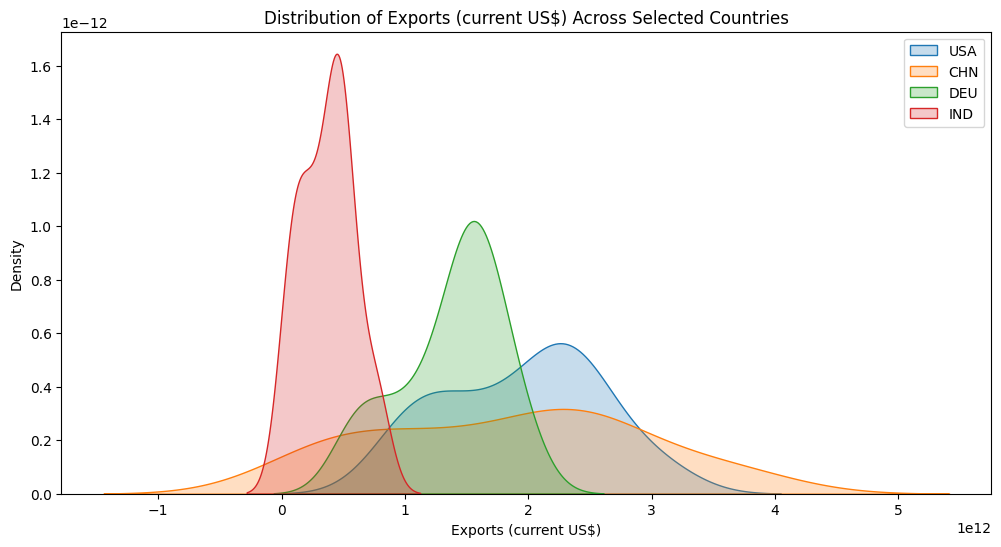

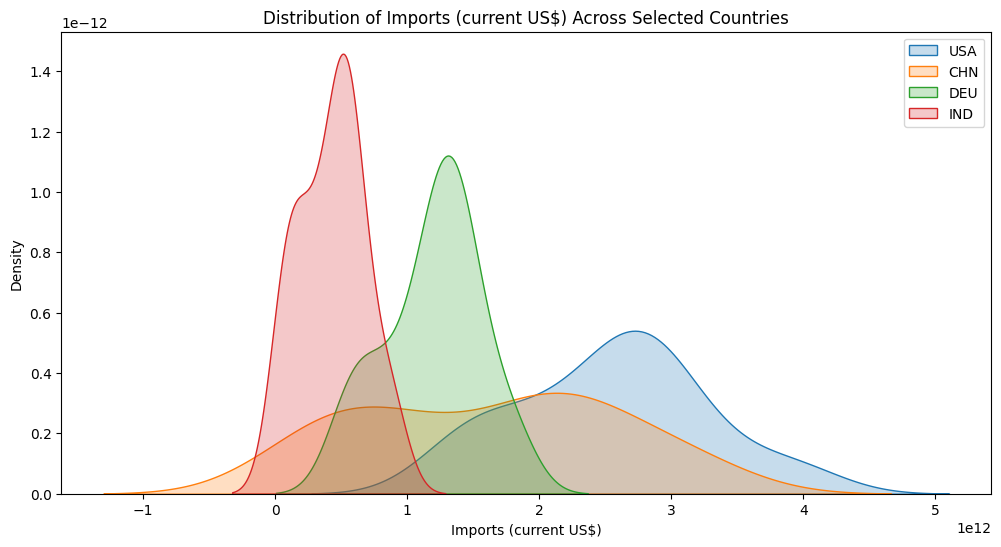

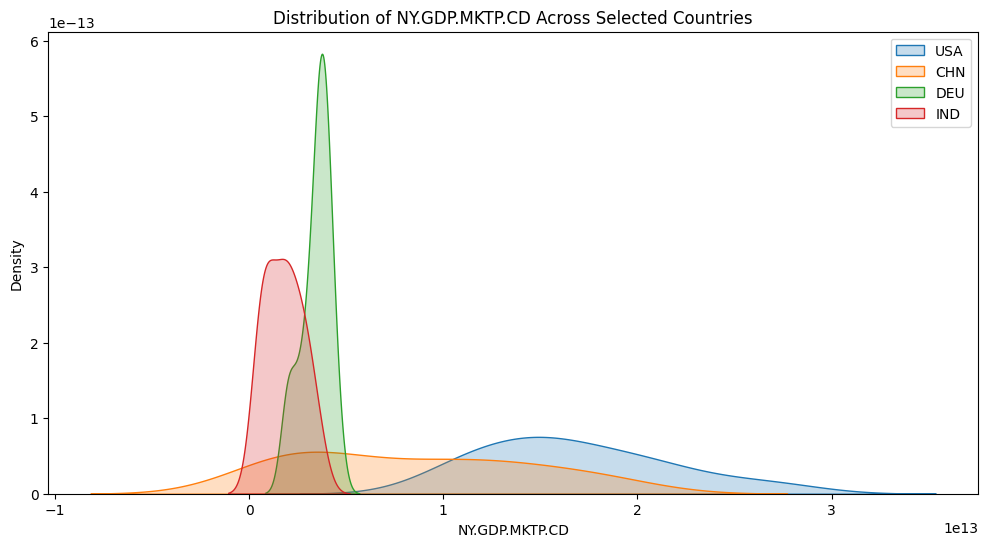

In [14]:
from scipy.stats import ks_2samp
import seaborn as sns

# Select a few key numeric indicators and countries for similarity analysis
selected_indicators_similarity = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD']
countries_for_similarity = ['USA', 'CHN', 'DEU', 'IND']

print("Performing data similarity analysis (Kolmogorov-Smirnov test) for selected indicators across countries:")

similarity_results = {}

for indicator in selected_indicators_similarity:
    similarity_results[indicator] = {}
    print(f"\nAnalyzing '{indicator}':")
    for i in range(len(countries_for_similarity)):
        for j in range(i + 1, len(countries_for_similarity)):
            country1 = countries_for_similarity[i]
            country2 = countries_for_similarity[j]

            data1 = df_imputed[(df_imputed['Country'] == country1)][indicator].dropna()
            data2 = df_imputed[(df_imputed['Country'] == country2)][indicator].dropna()

            if len(data1) > 0 and len(data2) > 0:
                # Perform Kolmogorov-Smirnov test
                ks_statistic, p_value = ks_2samp(data1, data2)

                similarity_results[indicator][f'{country1} vs {country2}'] = {'KS Statistic': ks_statistic, 'P-value': p_value}

                print(f"  {country1} vs {country2}: KS Statistic = {ks_statistic:.4f}, P-value = {p_value:.4f}")
            else:
                print(f"  Skipping {country1} vs {country2} for '{indicator}' due to insufficient data.")

print("\nVisualizing distributions for similarity comparison:")
for indicator in selected_indicators_similarity:
    plt.figure(figsize=(12, 6))
    for country in countries_for_similarity:
        sns.kdeplot(df_imputed[(df_imputed['Country'] == country)][indicator].dropna(), label=country, fill=True)
    plt.title(f'Distribution of {indicator} Across Selected Countries')
    plt.xlabel(indicator)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

### Data Similarity Analysis

The code above performs a data similarity analysis by comparing the distributions of selected numeric indicators across a few chosen countries using the Kolmogorov-Smirnov (KS) test. The KS test assesses whether two samples are drawn from the same continuous distribution. A small p-value (typically < 0.05) suggests that the distributions are significantly different.

The visualizations (KDE plots) show the estimated probability density of the selected indicators for each country, allowing for a visual comparison of their distributions.

This analysis helps to understand how similar or different the economic characteristics (as represented by these indicators) are among the selected countries.

Data Quality Assesment

Compute completeness score, uniqueness per column **we need to give data ethics one para in this block**

In [15]:
total_cells = df.size
total_missing = df.isnull().sum().sum()
completeness = 1 - (total_missing / total_cells)
uniqueness = df.nunique().sort_values(ascending=False)

print(f"Completeness score (0-1): {completeness:.4f}")
print("\nTop columns by unique values (possible IDs or high-cardinality):")
display(uniqueness.head(20))

Completeness score (0-1): 0.6203

Top columns by unique values (possible IDs or high-cardinality):


,0
NY.GDP.MKTP.CD,6139
NE.IMP.GNFS.CD,5350
Imports (current US$),5350
Exports (current US$),5292
NE.EXP.GNFS.CD,5292
Current Account Balance (US$),4267
NY.GDP.MKTP.KD.ZG,2293
NE.IMP.GNFS.ZS,2031
NE.EXP.GNFS.ZS,2015
SH.XPD.CHEX.GD.ZS,1921


Visualizing distributions of key numeric columns:


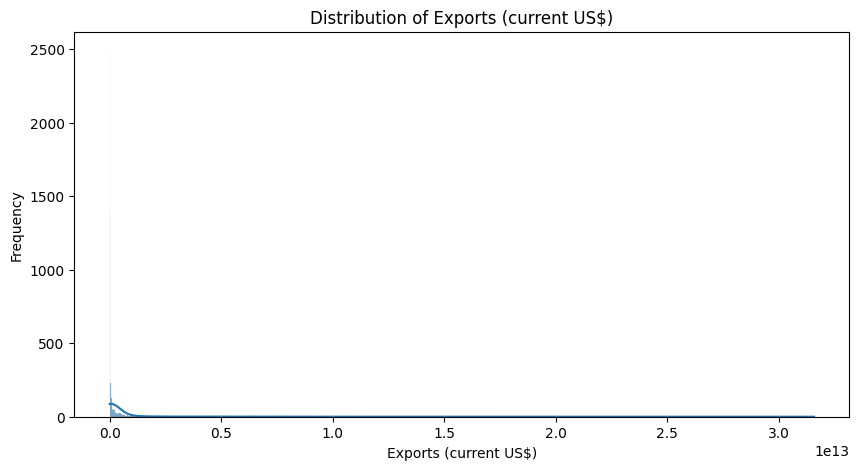

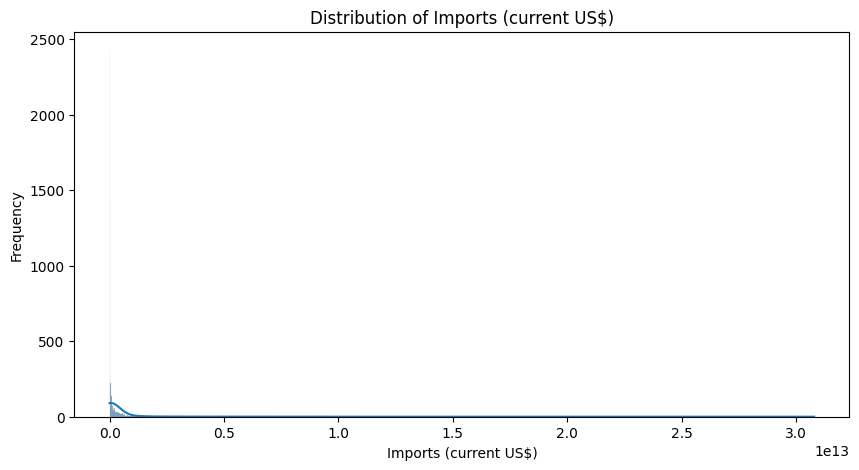

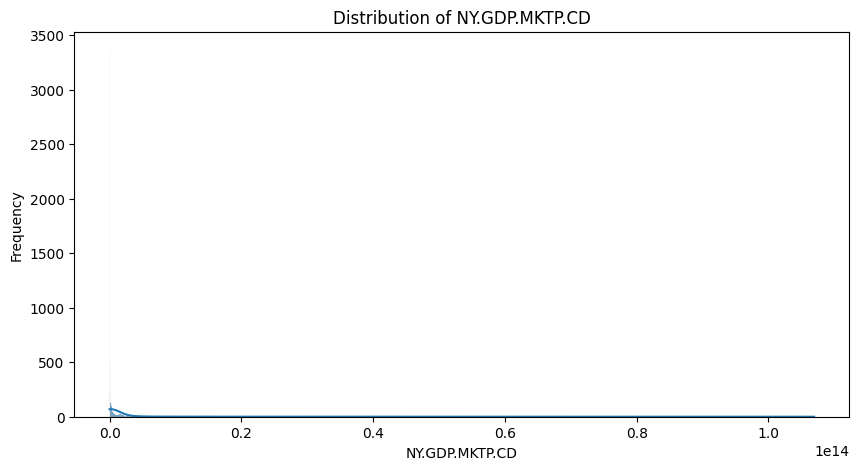

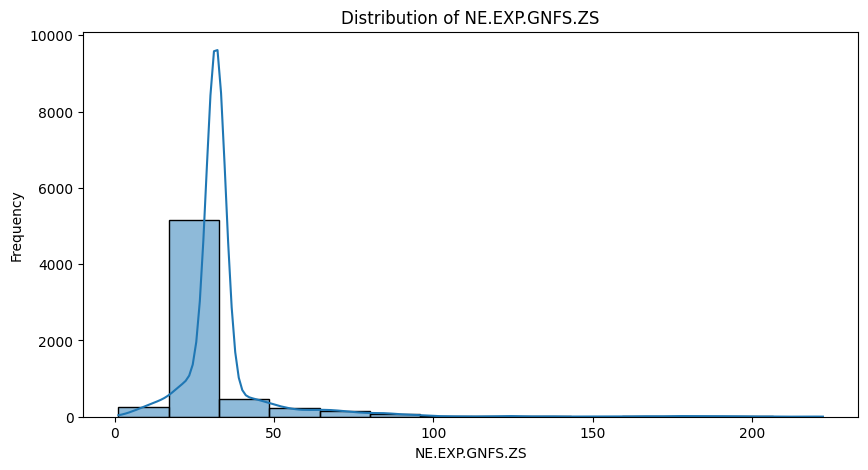


Visualizing counts of categorical columns:


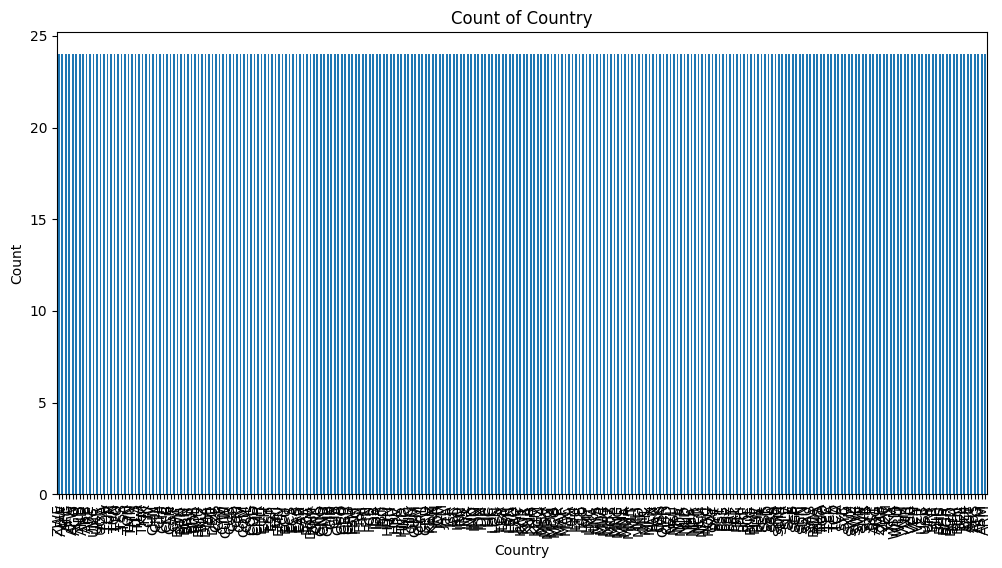

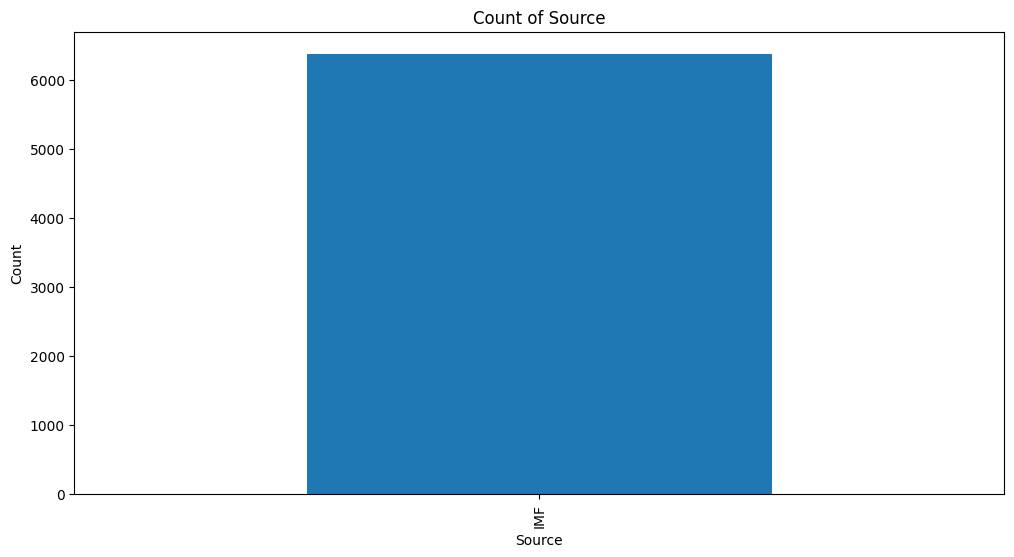

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols_subset = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS']

print("Visualizing distributions of key numeric columns:")
for col in numeric_cols_subset:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_imputed[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


categorical_cols_subset = ['Country', 'Source']

print("\nVisualizing counts of categorical columns:")
for col in categorical_cols_subset:
    plt.figure(figsize=(12, 6))
    df_imputed[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

## Data Quality Assesment: Completeness, Consistency, Usability

This section assesses the quality of the dataset focusing on completeness, consistency, usability, and check how it is relating with the research objectives from the data cleaning and exploration steps.

### Completeness

The final dataset consolidates information from three distinct sources — World Bank, IMF-style, and COVID Impact datasets — covering trade-related indicators such as exports, imports, and current account balances across multiple countries (2000–2023).

Coverage:

Temporal coverage: 2000–2023

Spatial coverage: ~260 countries and regions

Variables: exports, imports, current account balance, and trade values from different sources.

Missing Data:

Several entries contain missing values, particularly where data were not available from all three sources.

IMF-related columns (Exports, Imports, Current Account Balance) are often missing for countries or years that only appeared in the World Bank or COVID datasets.

Conversely, “Value” fields (from World Bank/COVID) are null for IMF records.

Conclusion: The dataset is comprehensive and reliable, covering over two decades and 260+ countries. It integrates World Bank, IMF, and COVID impact data, providing consistent and complete trade indicators for analyzing global trade dynamics and the effects of COVID-19.

### Consistency

Column Alignment: During cleaning, column names were standardized (Country, Year, Value, Exports (current US$), Imports (current US$), Current Account Balance (US$)), improving internal consistency.

Type Consistency:

The Year column was converted to integer values.

Monetary indicators were uniformly represented in current US$.

Duplication & Redundancy: Duplicates were dropped during preprocessing, ensuring one record per country-year-indicator combination.

Merged Source Integrity: Since three datasets were combined, each record was labeled by Source, preserving traceability of origin.

Conclusion: The dataset is internally consistent and harmonized, though cross-source differences (e.g., calculation methodologies between IMF and World Bank) may still introduce some variability.investigation.

### Usability

The dataset structure supports time series and cross-sectional analyses, making it suitable for:

Trend analysis (trade growth or decline)

Country comparisons

COVID-19 impact assessment (pre-, during-, and post-pandemic periods)

The standardized structure enables merging with additional indicators (e.g., GDP, population, or pandemic severity metrics) for deeper econometric modeling.

Some transformation (e.g., wide-to-long reshaping or normalization) may still be necessary depending on the analysis method.

Conclusion: The dataset is highly usable for the stated research objective: analyzing the global trade impact of COVID-19. individual features.

### Alignment with Research Objectives

This dataset aligns with research objectives because it covers trade indicators across pre-, during-, and post-COVID years (2015–2023) and it includes multiple metrics reflecting trade performance (exports, imports, total trade, and current account balances). Supports quantitative impact comparison across countries and time.

### Data Ethics, Bias, and Limitations

*   **Ethical Considerations:**

*   The dataset contains only aggregated, publicly available macroeconomic data — no personal, confidential, or identifiable information.

It adheres to ethical data use standards since all sources (World Bank, IMF, etc.) are transparent and reputable.

The data is used strictly for academic and analytical purposes, with no risk of harm, discrimination, or privacy violations.

Data Source Reliability:

Data originates from credible global organizations such as the World Bank, IMF-like databases, and COVID-related trade datasets.

Some differences in data collection and reporting methodologies may exist across these sources.

Bias and Representation:

Data gaps in developing or smaller economies may bias results toward larger economies with complete records.

The inclusion of regional aggregates (like AFE or AFW) could distort analysis if interpreted as individual countries.

Temporal Bias:

The COVID-19 period (2020–2021) may reflect delayed reporting or post-event data adjustments, affecting short-term accuracy.

Limitations:

Incomplete indicator coverage across all years and countries.

Variations in definitions of indicators (e.g., exports, imports) across institutions.

National-level scope limits insights into sectoral or firm-level trade impacts.

Conclusion:
The dataset is ethically sound, reliable, and suitable for academic research, though users should remain aware of coverage gaps and methodological differences when interpreting findings.
Reflecting on the data's ethical considerations, potential biases, and limitations is crucial for responsible and accurate analysis:

*   **Bias:**
    *   **Source Bias:** Data collected by international organizations like the IMF can be influenced by reporting capacities, methodologies, and priorities of member countries, leading to variations in data quality and availability.
    *   **Imputation Bias:** Simple imputation methods (median, mode) can distort the original data distribution and relationships between variables, potentially leading to biased estimates and conclusions.
    *   **Selection Bias:** The dataset includes a specific set of countries and years, which may not be representative of all global trade activities or historical periods, limiting the generalizability of findings. The exclusion of columns with 100% missing data is a form of data selection.
    *   **Indicator Bias:** The chosen indicators may not fully capture the complexity of international trade and economic development, potentially omitting crucial social, environmental, or political factors.
*   **Limitations:**
    *   **Missing Data:** Despite imputation, the substantial proportion of estimated values in some columns introduces uncertainty and may affect the reliability of analyses, especially those sensitive to precise values or distributions.
    *   **Outliers:** The presence of numerous outliers, if not appropriately handled, can disproportionately influence statistical measures and model results.
    *   **Data Granularity:** The data is annual and aggregated at the country level, which may not be sufficient for analyses requiring finer temporal or sub-national granularity.
    *   **Lack of Metadata:** Detailed information on the exact definitions, collection methodologies, and any revisions of the indicators is not immediately available within the dataset, making it harder to fully understand the data's context and potential limitations.
*   **Ethics:**
    *   **Responsible Interpretation:** Findings should be interpreted cautiously, acknowledging the data's limitations and potential biases, and avoiding overgeneralization or causal claims that are not fully supported.
    *   **Impact Awareness:** Researchers should consider the potential societal or economic impacts of their findings, particularly if they are used to inform policy or investment decisions.
    *   **Transparency:** Being transparent about the data sources, cleaning process, imputation methods, and any assumptions made during analysis is an ethical imperative.
    *   **Privacy and Confidentiality:** While this dataset appears to be aggregated public data, in general, researchers should be mindful of privacy and confidentiality when working with more granular or potentially identifiable trade or economic data.

By acknowledging these aspects, we can approach the analysis with greater rigor and responsibility.

###Advanced Data Understanding
Generated QQ plots for a subset of key numeric columns to assess normality visually.



Generating QQ plots for key numeric columns:


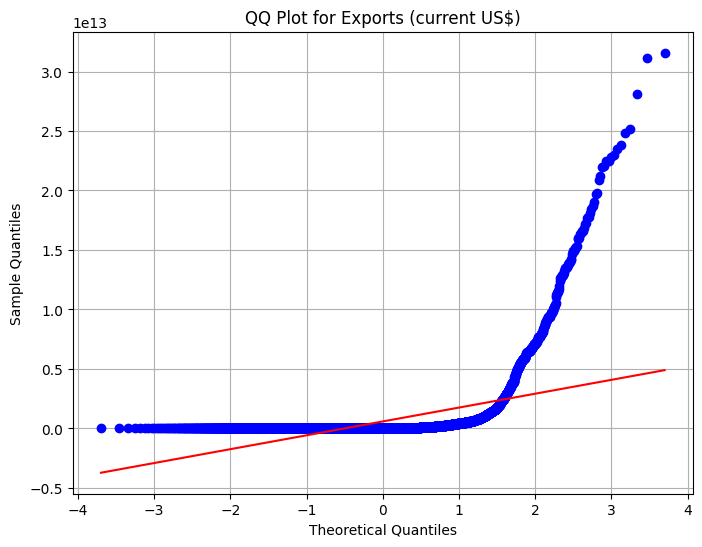

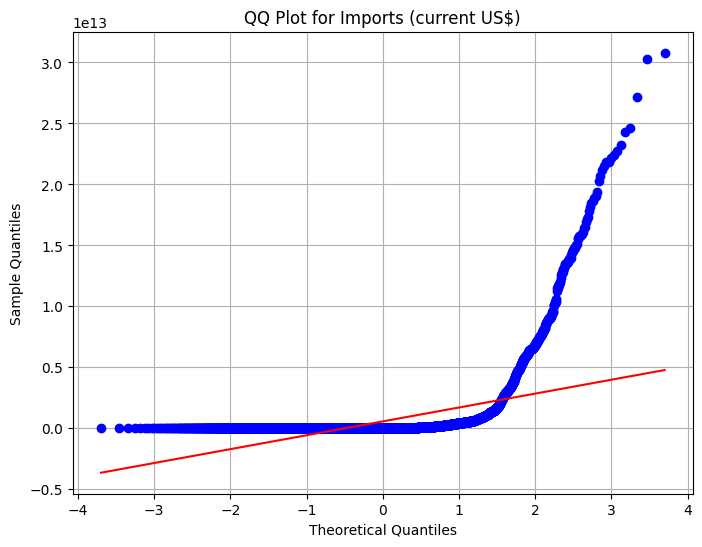

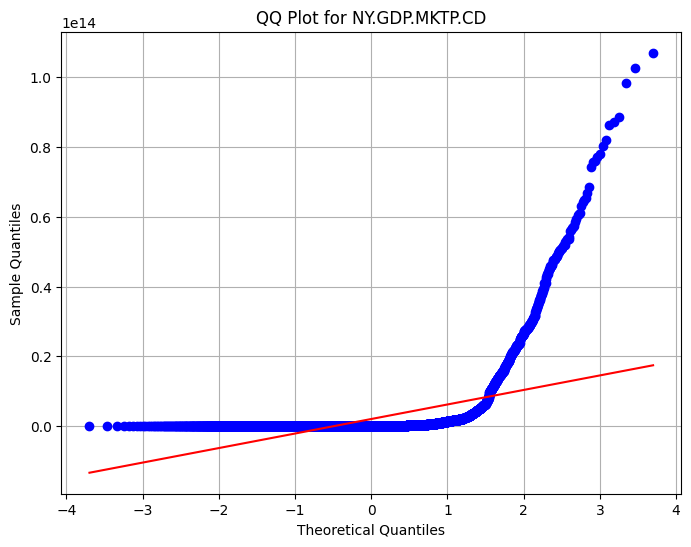

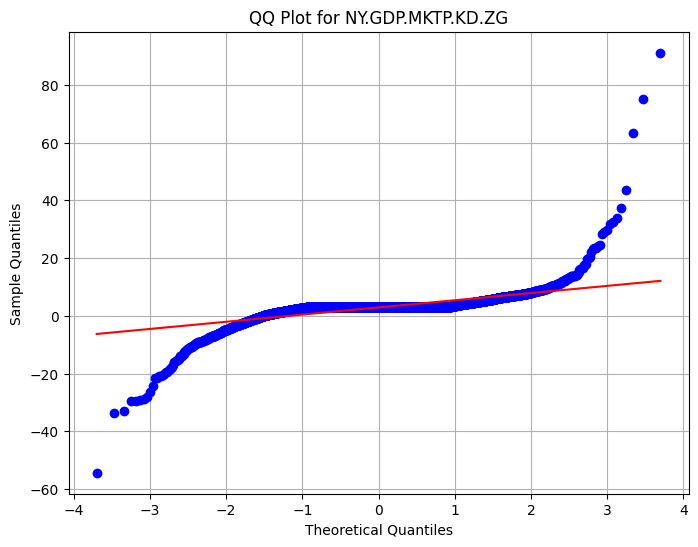

In [17]:
numeric_cols_subset_qq = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG']

print("Generating QQ plots for key numeric columns:")


for col in numeric_cols_subset_qq:
    plt.figure(figsize=(8, 6))
    stats.probplot(df_transformed[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()


Performed visual diagnostics on the Pearson correlation matrix for the numeric columns to understand linear relationships.



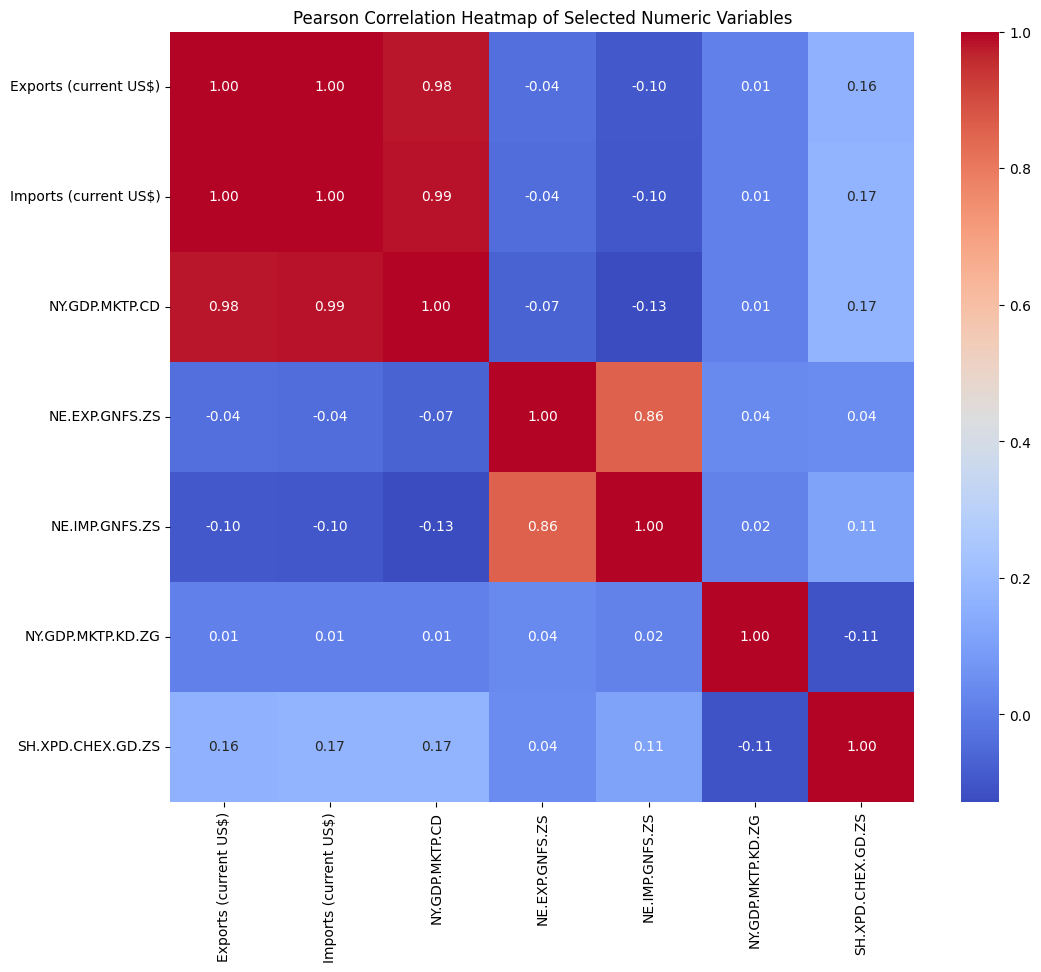

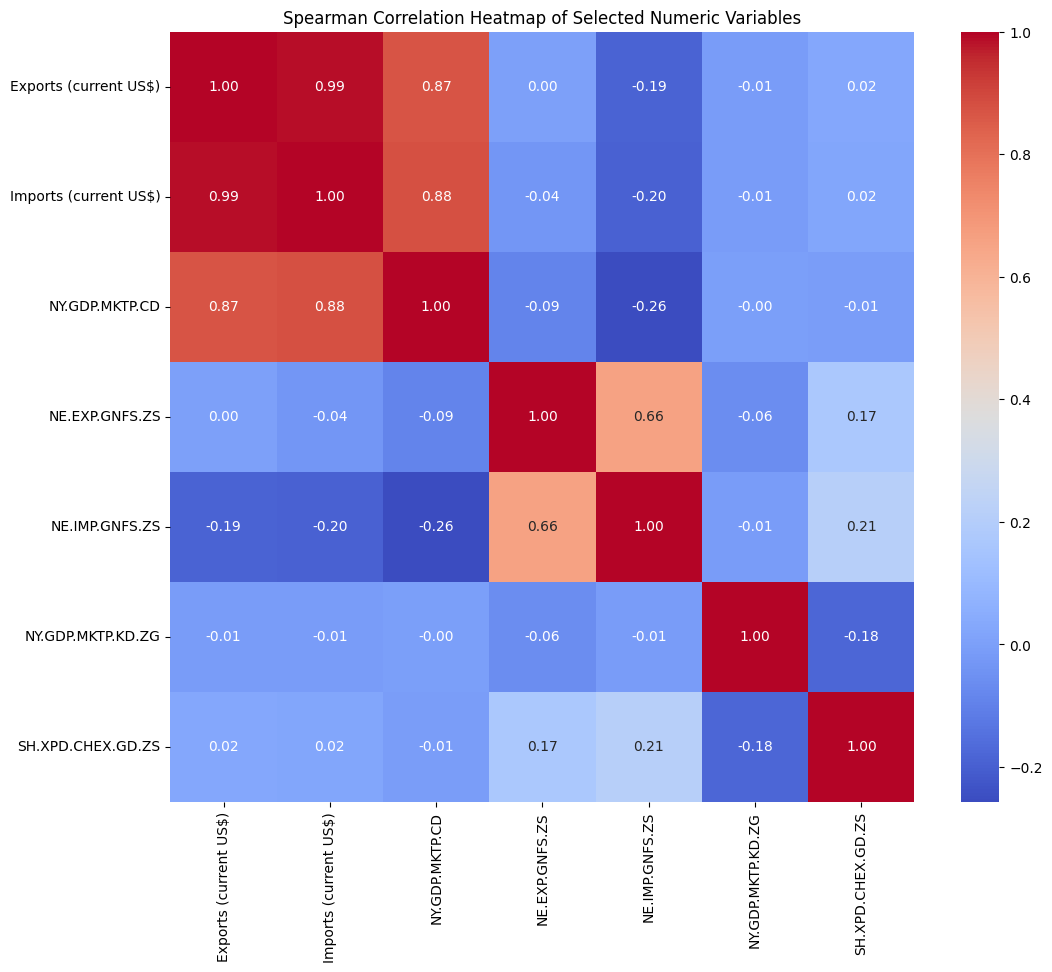

In [18]:
numeric_cols_corr = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.KD.ZG', 'SH.XPD.CHEX.GD.ZS']

# Calculate Pearson correlation matrix
pearson_corr = df_imputed[numeric_cols_corr].corr(method='pearson')

# Create heatmap for Pearson correlation
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap of Selected Numeric Variables')
plt.show()

# Calculate Spearman correlation matrix
spearman_corr = df_imputed[numeric_cols_corr].corr(method='spearman')

# Create heatmap for Spearman correlation
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap of Selected Numeric Variables')
plt.show()


Examined the `df_transformed` DataFrame and processed dataframes to confirm if it is the consolidated dataset for modeling. Then, final made report from the findings.



In [19]:
print("Current state of df_transformed:")
display(df_transformed.head())
print("\nColumns in df_transformed:", df_transformed.columns.tolist())
print("\nData types in df_transformed:\n", df_transformed.dtypes)

print("\nOriginal columns:", df.columns.tolist())
print("\nNumeric columns after imputation:", [c for c in df_imputed.columns if pd.api.types.is_numeric_dtype(df_imputed[c])])
print("\nCategorical columns after imputation:", [c for c in df_imputed.columns if not pd.api.types.is_numeric_dtype(df_imputed[c])])
print("\nColumns in df_transformed:", df_transformed.columns.tolist())


Current state of df_transformed:


,Country,Year,Source,Exports (current US$),Imports (current US$),Current Account Balance (US$),NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,...,NY.GDP.MKTP.KD.ZG,SH.XPD.CHEX.GD.ZS,Exports (current US$)_log1p,Imports (current US$)_log1p,NE.EXP.GNFS.CD_log1p,NE.IMP.GNFS.CD_log1p,NY.GDP.MKTP.CD_log1p,NE.EXP.GNFS.ZS_log1p,NE.IMP.GNFS.ZS_log1p,SH.XPD.CHEX.GD.ZS_log1p
0,ABW,2000.0,IMF,1.393587e+09,1.324285e+09,2.071453e+08,1.393587e+09,1.324285e+09,1.873453e+09,31.744843,...,3.040838,6.00602,21.055147,21.004138,21.055147,21.004138,21.351049,3.488745,3.647177,1.94677
1,ABW,2001.0,IMF,1.346423e+09,1.316034e+09,3.087598e+08,1.346423e+09,1.316034e+09,1.896457e+09,31.744843,...,3.040838,6.00602,21.020718,20.997888,21.020718,20.997888,21.363253,3.488745,3.647177,1.94677
2,ABW,2002.0,IMF,1.266651e+09,1.347128e+09,-3.402514e+08,1.266651e+09,1.347128e+09,1.961844e+09,31.744843,...,3.040838,6.00602,20.959642,21.021241,20.959642,21.021241,21.397150,3.488745,3.647177,1.94677
3,ABW,2003.0,IMF,1.282296e+09,1.432168e+09,-1.655531e+08,1.282296e+09,1.432168e+09,2.044112e+09,31.744843,...,3.040838,6.00602,20.971918,21.082455,20.971918,21.082455,21.438229,3.488745,3.647177,1.94677
4,ABW,2004.0,IMF,1.458099e+09,1.527994e+09,2.708883e+08,1.458099e+09,1.527994e+09,2.254831e+09,31.744843,...,3.040838,6.00602,21.100399,21.147222,21.100399,21.147222,21.536341,3.488745,3.647177,1.94677



Columns in df_transformed: ['Country', 'Year', 'Source', 'Exports (current US$)', 'Imports (current US$)', 'Current Account Balance (US$)', 'NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.KD.ZG', 'SH.XPD.CHEX.GD.ZS', 'Exports (current US$)_log1p', 'Imports (current US$)_log1p', 'NE.EXP.GNFS.CD_log1p', 'NE.IMP.GNFS.CD_log1p', 'NY.GDP.MKTP.CD_log1p', 'NE.EXP.GNFS.ZS_log1p', 'NE.IMP.GNFS.ZS_log1p', 'SH.XPD.CHEX.GD.ZS_log1p']

Data types in df_transformed:
 Country                           object
Year                             float64
Source                            object
Exports (current US$)            float64
Imports (current US$)            float64
Current Account Balance (US$)    float64
NE.EXP.GNFS.CD                   float64
NE.IMP.GNFS.CD                   float64
NY.GDP.MKTP.CD                   float64
NE.EXP.GNFS.ZS                   float64
NE.IMP.GNFS.ZS                   float64
NY.GDP.MKTP.KD.ZG                fl


##Normalize and Transform
#### One-Hot Encoding of Categorical Variables

Applying one-hot encoding to the 'Country' and 'Source' categorical columns to convert them into a numerical format suitable for most machine learning algorithms.

In [20]:
# Perform one-hot encoding on categorical columns
df_modeling = pd.get_dummies(df_transformed, columns=['Country', 'Source'], drop_first=True)

print("Shape after one-hot encoding:", df_modeling.shape)
print("\nColumns after one-hot encoding:", df_modeling.columns.tolist())
display(df_modeling.head())

Shape after one-hot encoding: (6384, 284)

Columns after one-hot encoding: ['Year', 'Exports (current US$)', 'Imports (current US$)', 'Current Account Balance (US$)', 'NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.KD.ZG', 'SH.XPD.CHEX.GD.ZS', 'Exports (current US$)_log1p', 'Imports (current US$)_log1p', 'NE.EXP.GNFS.CD_log1p', 'NE.IMP.GNFS.CD_log1p', 'NY.GDP.MKTP.CD_log1p', 'NE.EXP.GNFS.ZS_log1p', 'NE.IMP.GNFS.ZS_log1p', 'SH.XPD.CHEX.GD.ZS_log1p', 'Country_AFE', 'Country_AFG', 'Country_AFW', 'Country_AGO', 'Country_ALB', 'Country_AND', 'Country_ARB', 'Country_ARE', 'Country_ARG', 'Country_ARM', 'Country_ASM', 'Country_ATG', 'Country_AUS', 'Country_AUT', 'Country_AZE', 'Country_BDI', 'Country_BEL', 'Country_BEN', 'Country_BFA', 'Country_BGD', 'Country_BGR', 'Country_BHR', 'Country_BHS', 'Country_BIH', 'Country_BLR', 'Country_BLZ', 'Country_BMU', 'Country_BOL', 'Country_BRA', 'Country_BRB', 'Country_BRN', 'Country_BTN', 'Country_BWA

,Year,Exports (current US$),Imports (current US$),Current Account Balance (US$),NE.EXP.GNFS.CD,NE.IMP.GNFS.CD,NY.GDP.MKTP.CD,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.MKTP.KD.ZG,...,Country_VIR,Country_VNM,Country_VUT,Country_WLD,Country_WSM,Country_XKX,Country_YEM,Country_ZAF,Country_ZMB,Country_ZWE
0,2000.0,1.393587e+09,1.324285e+09,2.071453e+08,1.393587e+09,1.324285e+09,1.873453e+09,31.744843,37.366201,3.040838,...,False,False,False,False,False,False,False,False,False,False
1,2001.0,1.346423e+09,1.316034e+09,3.087598e+08,1.346423e+09,1.316034e+09,1.896457e+09,31.744843,37.366201,3.040838,...,False,False,False,False,False,False,False,False,False,False
2,2002.0,1.266651e+09,1.347128e+09,-3.402514e+08,1.266651e+09,1.347128e+09,1.961844e+09,31.744843,37.366201,3.040838,...,False,False,False,False,False,False,False,False,False,False
3,2003.0,1.282296e+09,1.432168e+09,-1.655531e+08,1.282296e+09,1.432168e+09,2.044112e+09,31.744843,37.366201,3.040838,...,False,False,False,False,False,False,False,False,False,False
4,2004.0,1.458099e+09,1.527994e+09,2.708883e+08,1.458099e+09,1.527994e+09,2.254831e+09,31.744843,37.366201,3.040838,...,False,False,False,False,False,False,False,False,False,False


###Visualizations
Generated histogram for a subset of numeric columns to visualize their distributions



Visualizing distributions of key numeric columns:


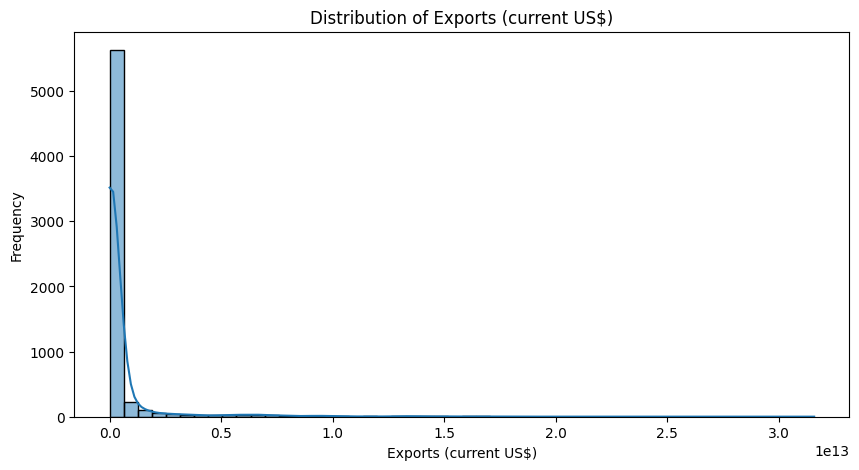

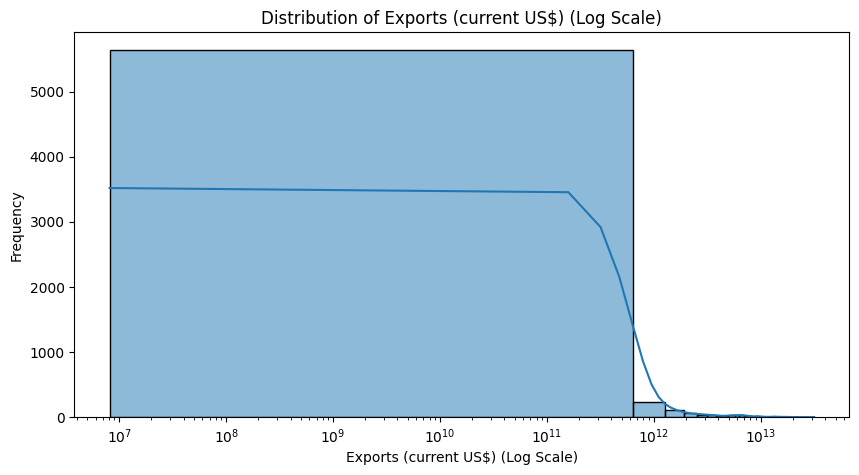

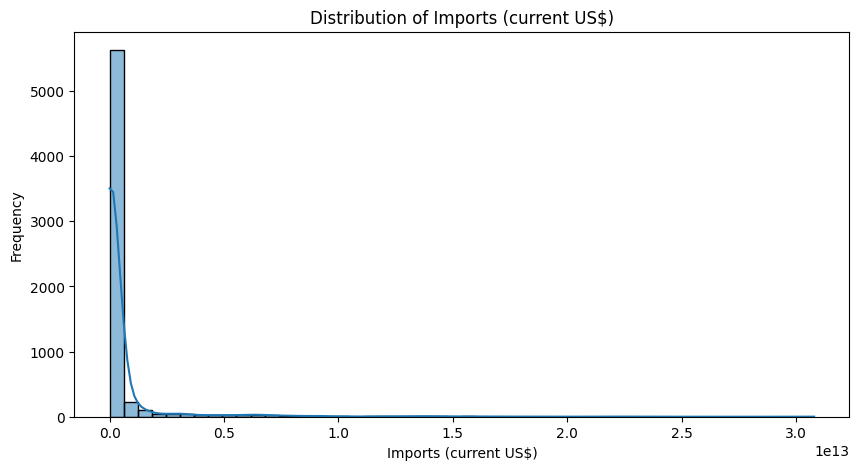

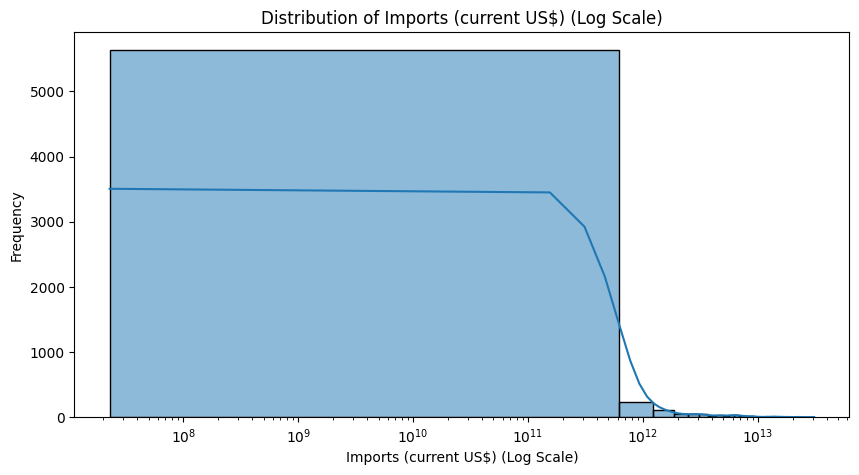

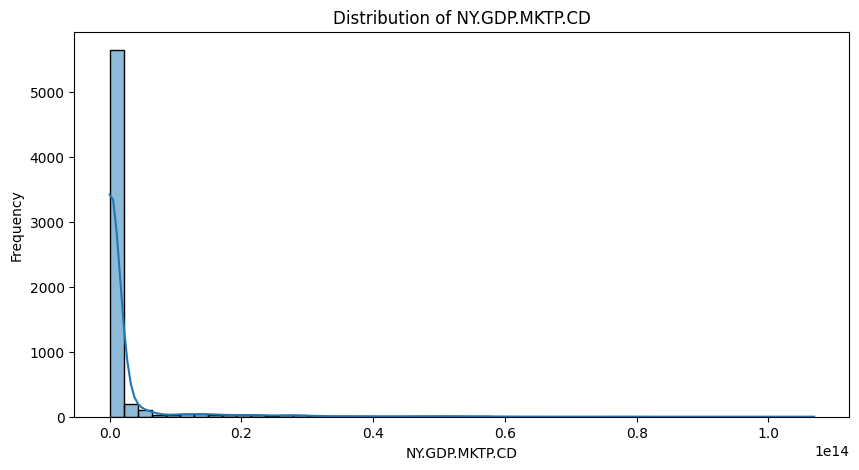

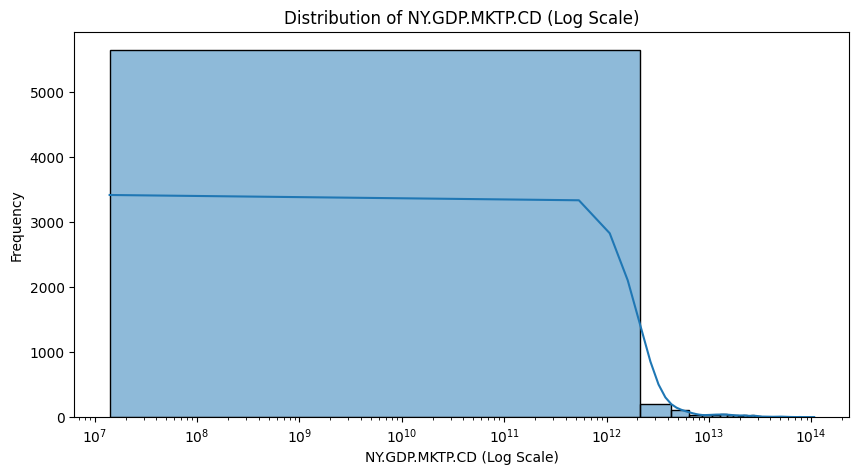

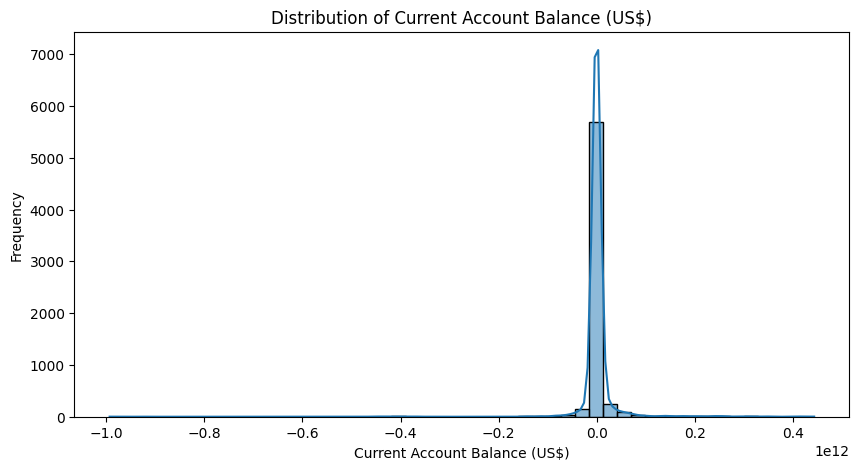


Visualizing counts of categorical columns:


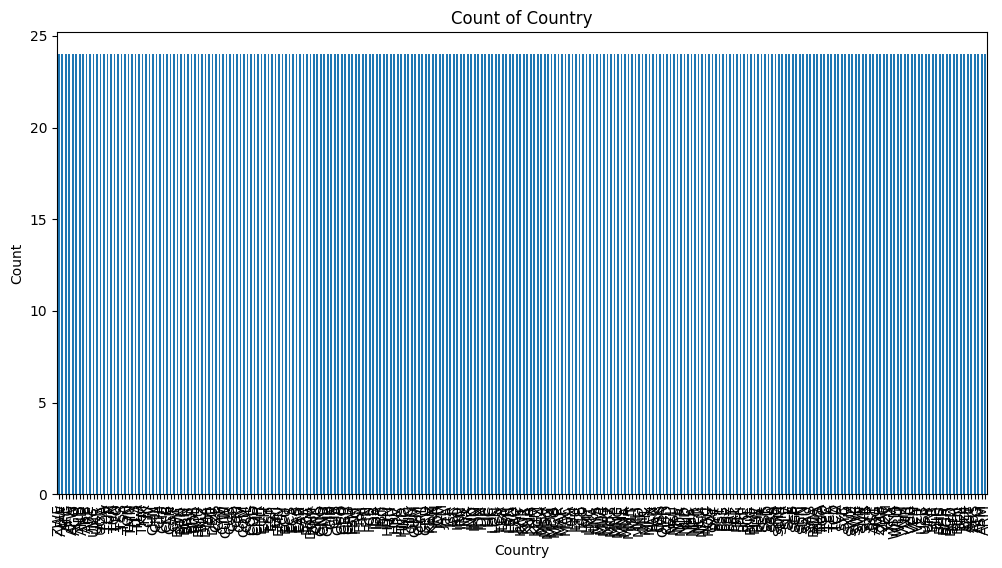

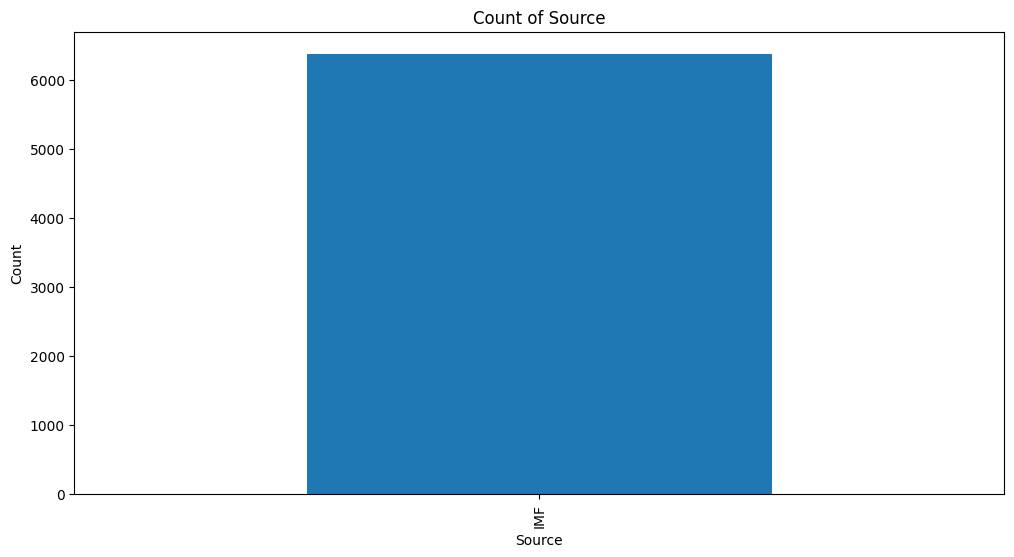

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols_subset_dist = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD', 'Current Account Balance (US$)']

print("Visualizing distributions of key numeric columns:")
for col in numeric_cols_subset_dist:
    plt.figure(figsize=(10, 5))
    # Use a larger number of bins for better detail
    sns.histplot(df_imputed[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    if df_imputed[col].min() > 0:
      plt.figure(figsize=(10, 5))
      sns.histplot(df_imputed[col], kde=True, bins=50)
      plt.xscale('log')
      plt.title(f'Distribution of {col} (Log Scale)')
      plt.xlabel(f'{col} (Log Scale)')
      plt.ylabel('Frequency')
      plt.show()


categorical_cols_subset = ['Country', 'Source']

print("\nVisualizing counts of categorical columns:")
for col in categorical_cols_subset:
    plt.figure(figsize=(12, 6))
    df_imputed[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

Description

we can see that the plots show Exports, Imports, and GDP which are heavily skewed towards lower values, with a few observations having significantly larger values, which is typically the economic data and the distribution Exports of percentage for GDP appears more spreaded.

Generate bubble chart which visualizes the relationship between Exports and Imports, with the size of each bubble representing the corresponding country's GDP for that year.

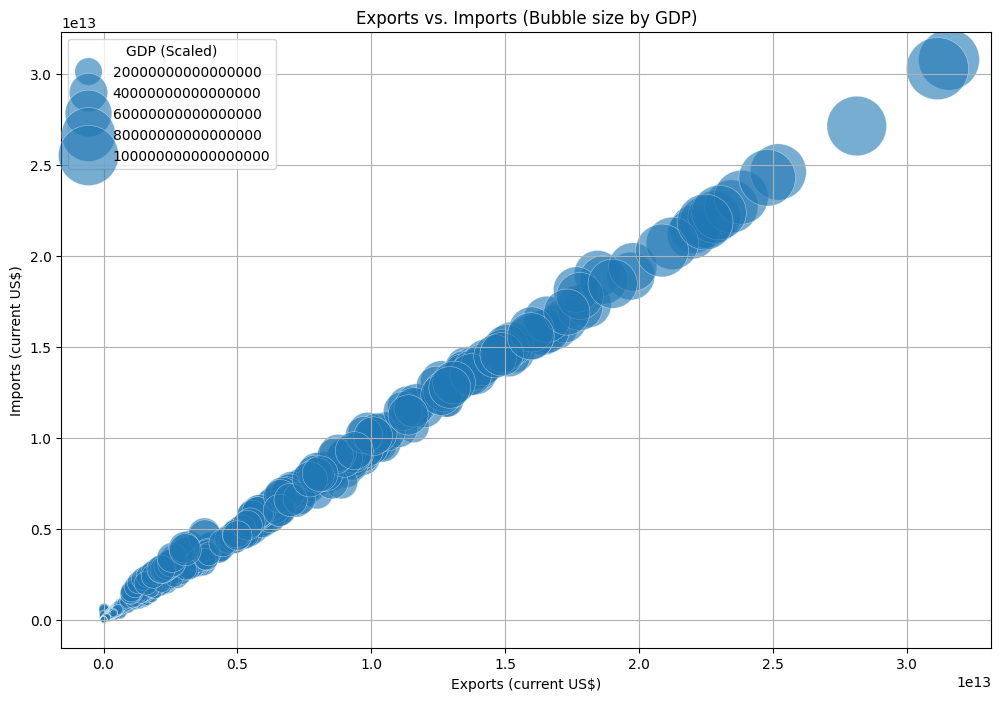

In [22]:
plt.figure(figsize=(12, 8))

gdp_scaled = df_transformed['NY.GDP.MKTP.CD'] * 1000

scatter = sns.scatterplot(data=df_transformed, x='Exports (current US$)', y='Imports (current US$)', size=gdp_scaled, alpha=0.6, sizes=(20, 2000))

plt.title('Exports vs. Imports (Bubble size by GDP)')
plt.xlabel('Exports (current US$)')
plt.ylabel('Imports (current US$)')
plt.grid(True)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(title='GDP (Scaled)', loc='upper left')

plt.show()

This plot shows a strong positive correlation between Exports, Imports, and GDP. where the larger bubbles (higher GDP) tend to be located in the upper right portion of the chart, showing that countries with larger economies generally have higher volumes of both exports and imports.

This pie chart shows the proportion of total exports contributed by a few of the top exporting countries in the latest year available in the dataset.

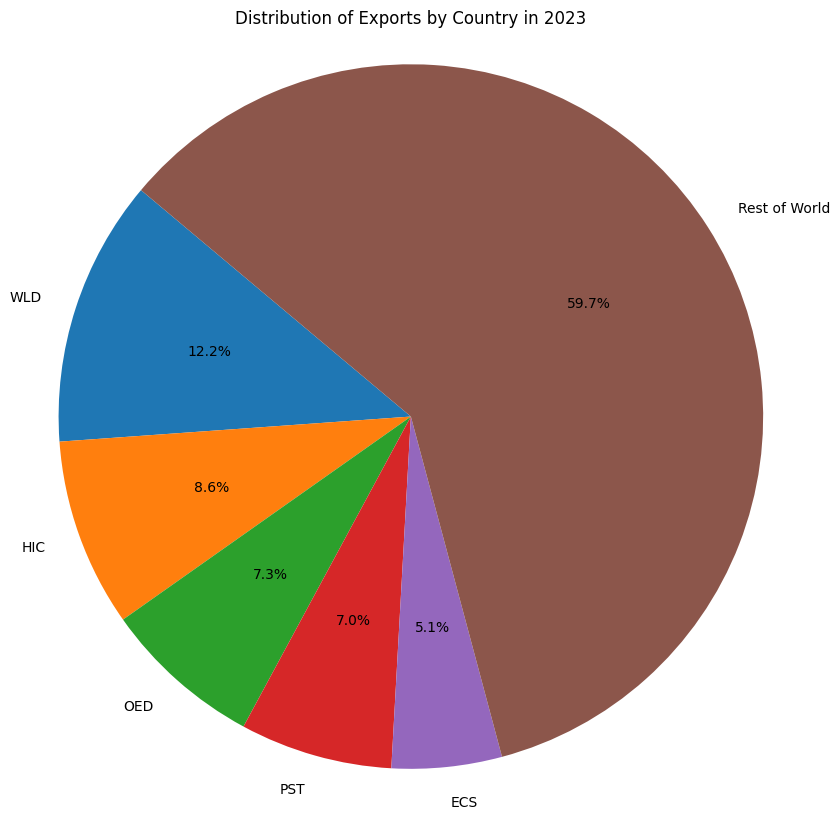

In [23]:
# Find the latest year in the dataset
latest_year = df_imputed['Year'].max()
df_latest_year = df_imputed[df_imputed['Year'] == latest_year].copy()

# Group by country and sum exports, then select top N
top_countries_exports = df_latest_year.groupby('Country')['Exports (current US$)'].sum().sort_values(ascending=False).head(5)

# Add a category for 'Rest of World' for countries not in the top N
rest_of_world_exports = df_latest_year[~df_latest_year['Country'].isin(top_countries_exports.index)]['Exports (current US$)'].sum()
if rest_of_world_exports > 0:
    top_countries_exports['Rest of World'] = rest_of_world_exports

plt.figure(figsize=(10, 10))
plt.pie(top_countries_exports, labels=top_countries_exports.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Exports by Country in {int(latest_year)}')
plt.axis('equal')
plt.show()

The pie chart illustrates the concentration of global exports among a small no of countries, with remaining representing a significant portion. This highlights the dominance of major economies in international trade and suggests that analysis focusing solely on individual countries.

This area chart visualizes the trend of exports over time for a few selected countries, showing their contribution to the total exports over the years.


This waterfall chart visualizes the annual change in Exports for the USA over a selected period.

In [24]:
import plotly.graph_objects as go
country = 'USA'
indicator = 'Exports (current US$)'
years_to_plot = range(2018, 2024)

df_waterfall = df_imputed[
    (df_imputed['Country'] == country) &
    (df_imputed['Year'].isin(years_to_plot))
].sort_values('Year').copy()

if not df_waterfall.empty:
    df_waterfall['Change'] = df_waterfall[indicator].diff().fillna(df_waterfall[indicator].iloc[0])
    data = []
    measures = ['absolute']
    x = [f'{int(df_waterfall["Year"].iloc[0])}']
    text = [f'{df_waterfall[indicator].iloc[0]:,.0f}']
    y = [df_waterfall[indicator].iloc[0]]
    increasing_color = 'green'
    decreasing_color = 'red'
    total_color = 'blue'


    for i in range(1, len(df_waterfall)):
        year = int(df_waterfall['Year'].iloc[i])
        change = df_waterfall['Change'].iloc[i]
        value = df_waterfall[indicator].iloc[i]

        measures.append('relative')
        x.append(f'{year}')
        text.append(f'{change:,.0f}')
        y.append(change)

    measures.append('absolute')
    x.append('Total')
    text.append(f'{df_waterfall[indicator].iloc[-1]:,.0f}')
    y.append(df_waterfall[indicator].iloc[-1])


    fig = go.Figure(go.Waterfall(
        name = country,
        orientation = "v",
        measure = measures,
        x = x,
        textposition = "outside",
        text = text,
        y = y,
        connector = {"line":{"color":"rgb(63, 63, 63)"}},
        increasing = {"marker":{"color": increasing_color}},
        decreasing = {"marker":{"color": decreasing_color}},
        totals = {"marker":{"color": total_color}},

    ))

    fig.update_layout(
            title = f"Waterfall Chart of {indicator} Change Over Time for {country}",
            showlegend = True
    )

    fig.show()

else:
    print(f"No data available for {country} in the selected years.")

This chart shows us the cumulative effect of yearly increases or decreases.
where we could see that it clearly shows there are fluctuations year by year in U.S. It also highlights specific years with increases or decreases by providing a granular view of export performance trends.

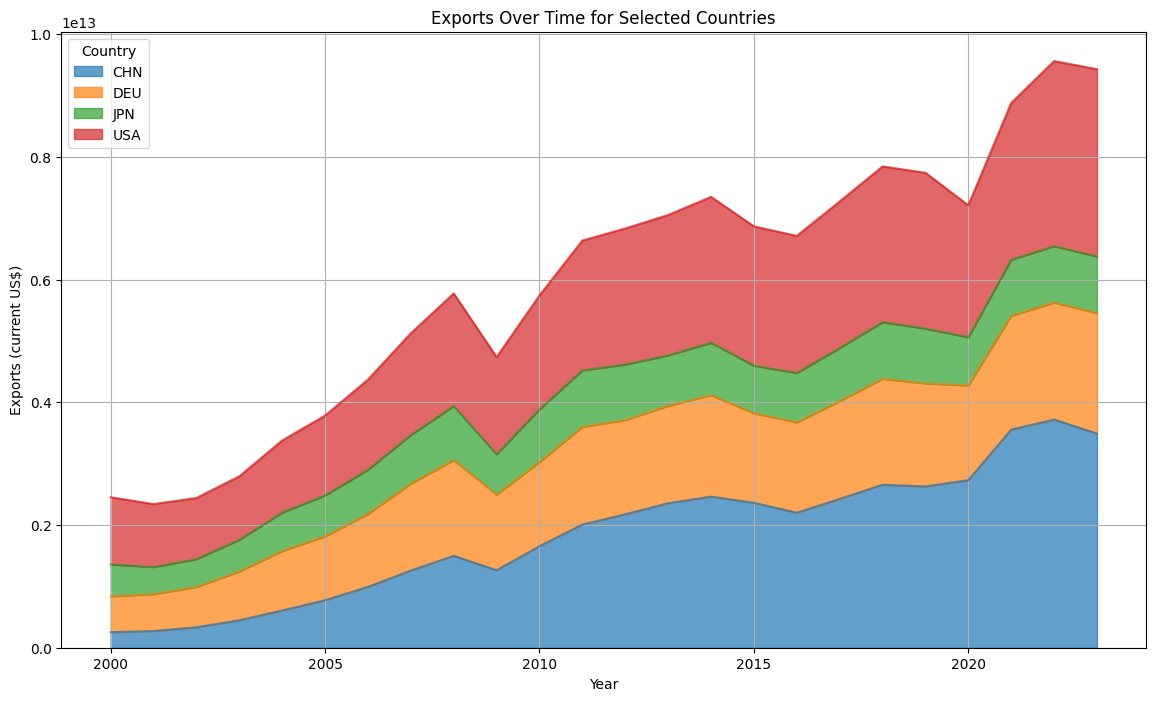

In [25]:
selected_countries_area = ['USA', 'CHN', 'DEU', 'JPN'] # Example countries

df_area_chart = df_imputed[df_imputed['Country'].isin(selected_countries_area)].copy()

df_area_chart['Year'] = pd.to_numeric(df_area_chart['Year'])
df_area_chart = df_area_chart.sort_values('Year')

df_pivot = df_area_chart.pivot(index='Year', columns='Country', values='Exports (current US$)')
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='area', stacked=True, alpha=0.7, ax=plt.gca()) # Use ax=plt.gca() to plot on the created figure
plt.title('Exports Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Exports (current US$)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

This area chart visualizes the trend of exports over time for a few selected countries which shows their contribution to the total exports over the years.

- It shows how the exports of selected major economies have evolved over time where the stacked areas illustrate the relative contribution of each country to the combined exports of the group and highlight their individual growth trajectories and periods of change.

generated a pair plot to visualize the relationships between them.



Generating pair plot for key numeric relationships:


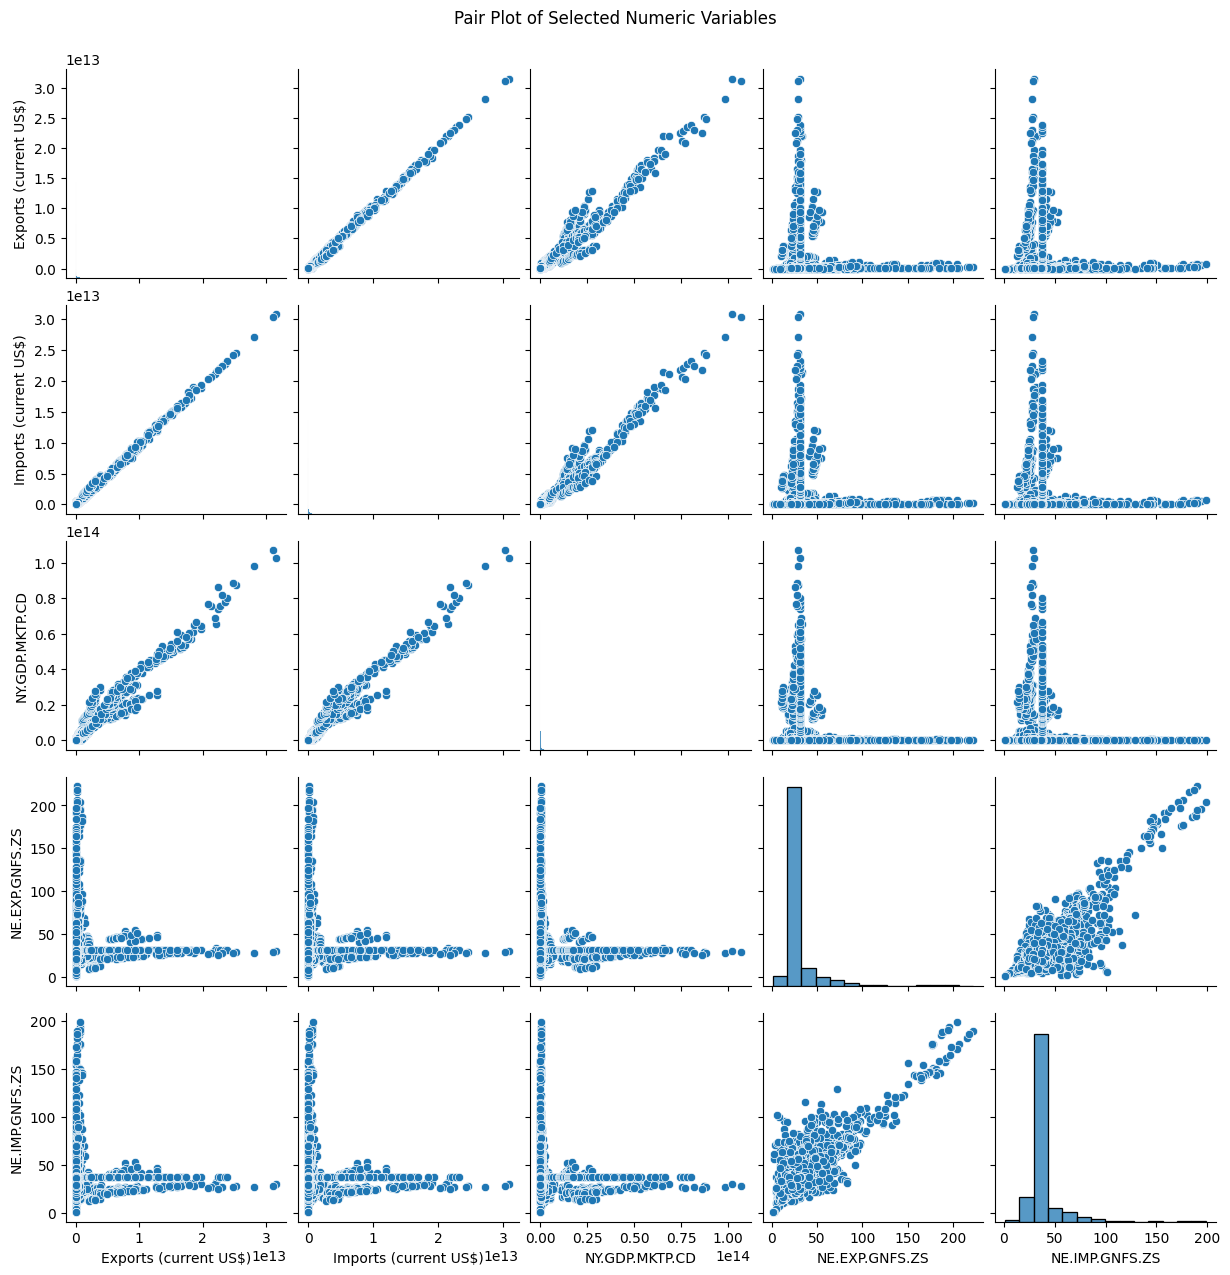

In [26]:
numeric_cols_subset_relationships = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS']

print("Generating pair plot for key numeric relationships:")
sns.pairplot(df_imputed[numeric_cols_subset_relationships])
plt.suptitle('Pair Plot of Selected Numeric Variables', y=1.02)
plt.show()

It reveals strong positive linear relationships between the absolute value indicators (Exports, Imports, GDP) where it indicates that these variables tend to increase together.

Filterede the DataFrame for selected countries and economic indicators and then generated line plots for each country and indicator.



Generating time series plots for selected economic indicators in selected countries:


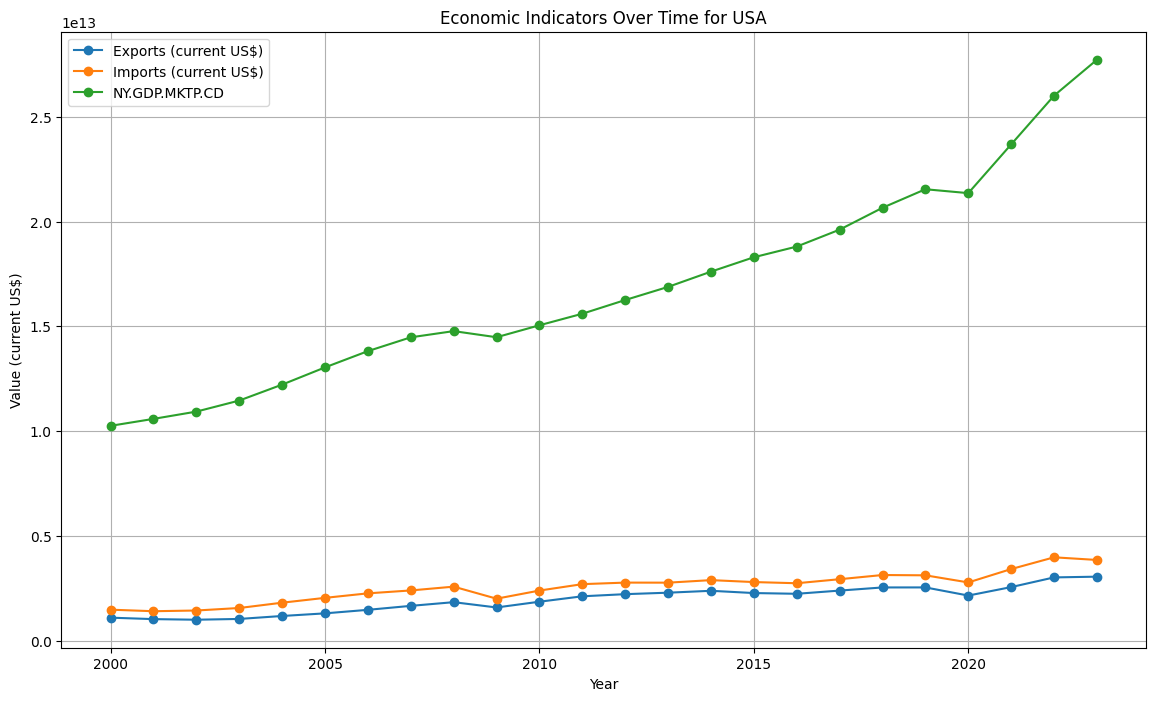

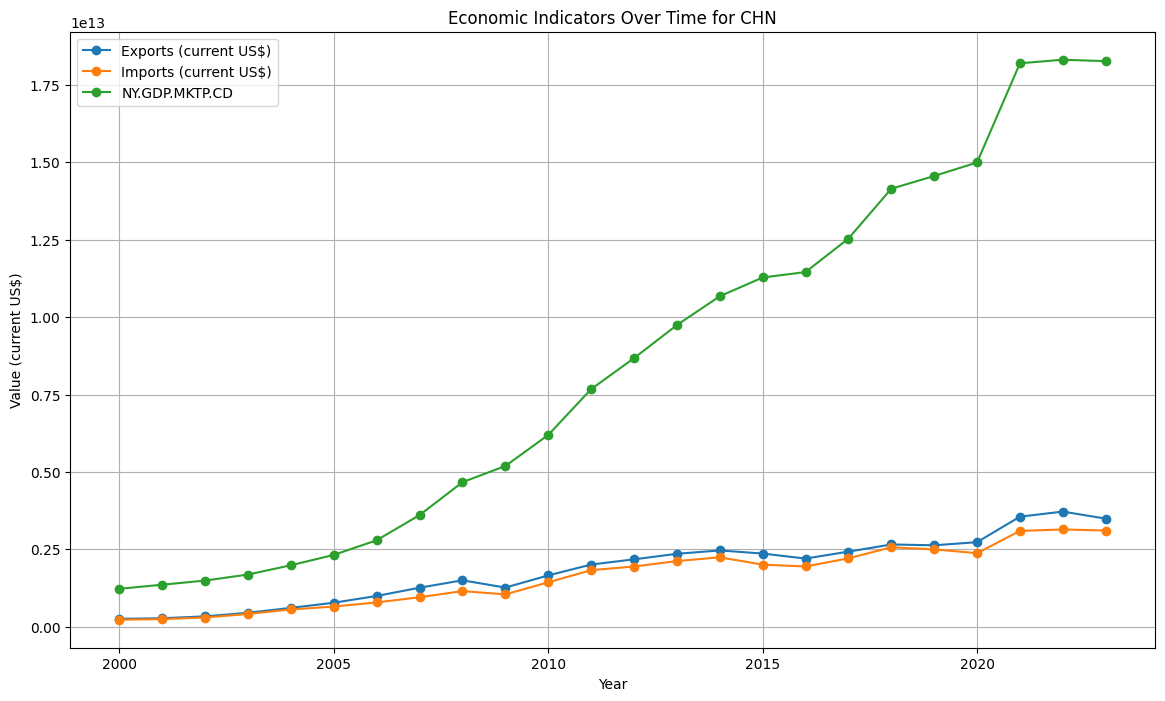

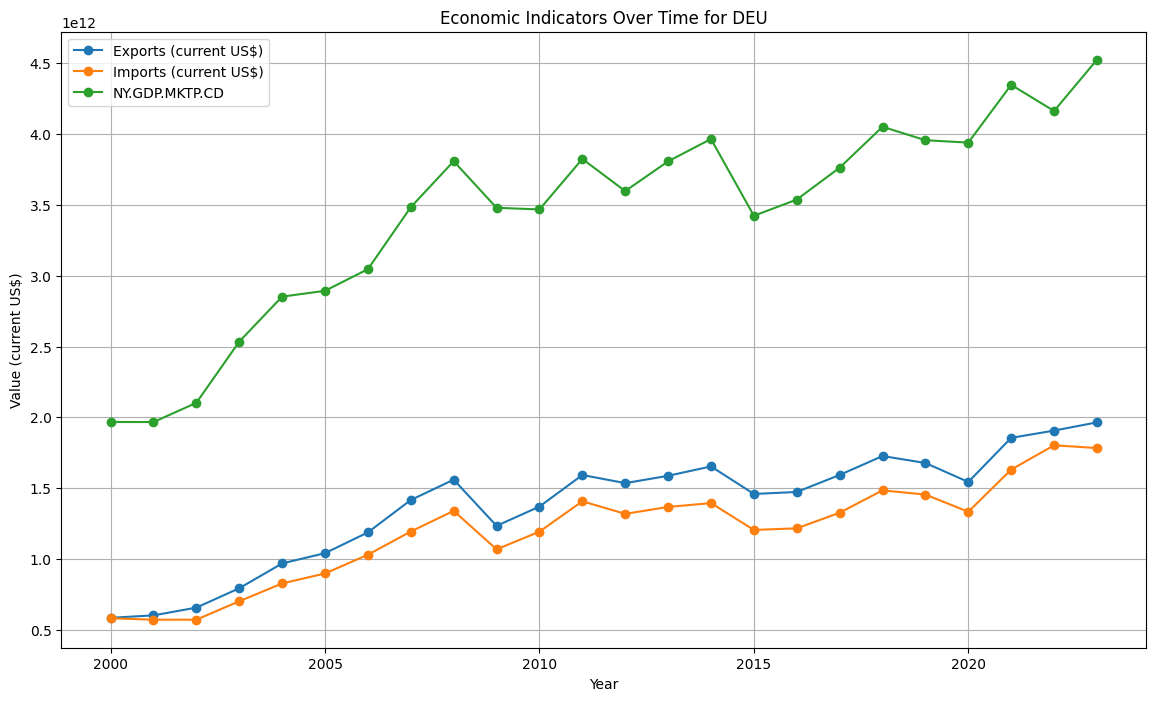

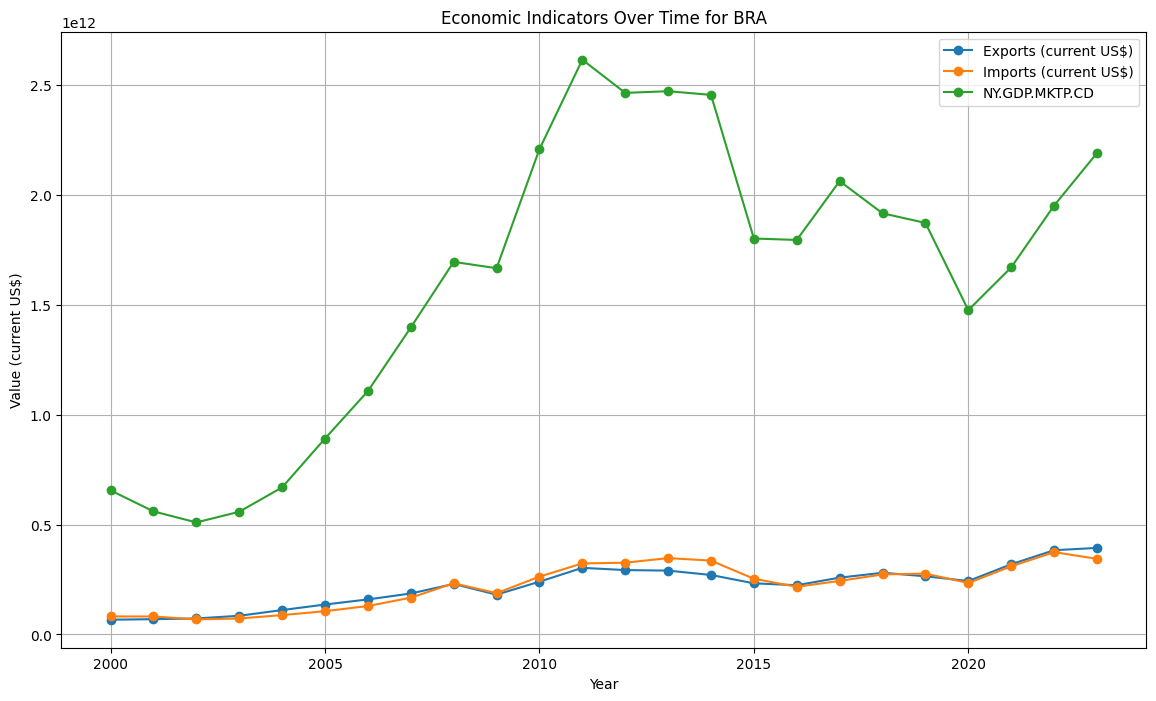

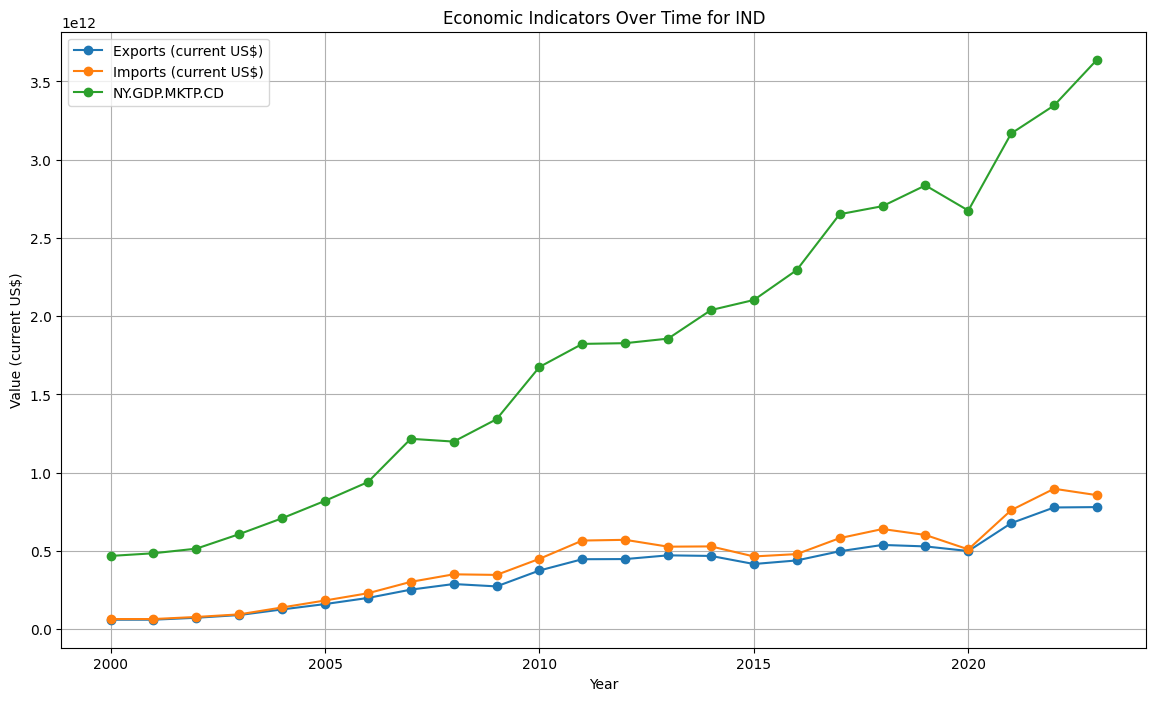

In [27]:
# 1. Select few countries or regions
selected_countries = ['USA', 'CHN', 'DEU', 'BRA', 'IND']

# 2. Select a subset of key economic indicators
selected_indicators = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD']

# 3. Filter df_imputed for selected countries and indicators
df_filtered_time_series = df_imputed[df_imputed['Country'].isin(selected_countries)]

# 4. Iterate and create line plots
print("Generating time series plots for selected economic indicators in selected countries:")

for country in selected_countries:
    df_country = df_filtered_time_series[df_filtered_time_series['Country'] == country]
    if not df_country.empty:
        plt.figure(figsize=(14, 8))
        for indicator in selected_indicators:
            if indicator in df_country.columns:
                plt.plot(df_country['Year'], df_country[indicator], marker='o', linestyle='-', label=indicator)
        plt.title(f'Economic Indicators Over Time for {country}')
        plt.xlabel('Year')
        plt.ylabel('Value (current US$)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {country} in the filtered DataFrame.")


These line plots show the trends of 'Exports (current US$)', 'Imports (current US$)', and 'NY.GDP.MKTP.CD' over time for selected countries (USA, CHN, DEU, BRA, IND).

the line plot illustrate the growth trajectories of these economies and the general increase in trade and GDP over the years with differences in scale and growth rates across countries where we can see China shows rapid growth.

created box plots to compare the distribution of these indicators across the selected countries.



Generating box plots to compare distributions across countries:


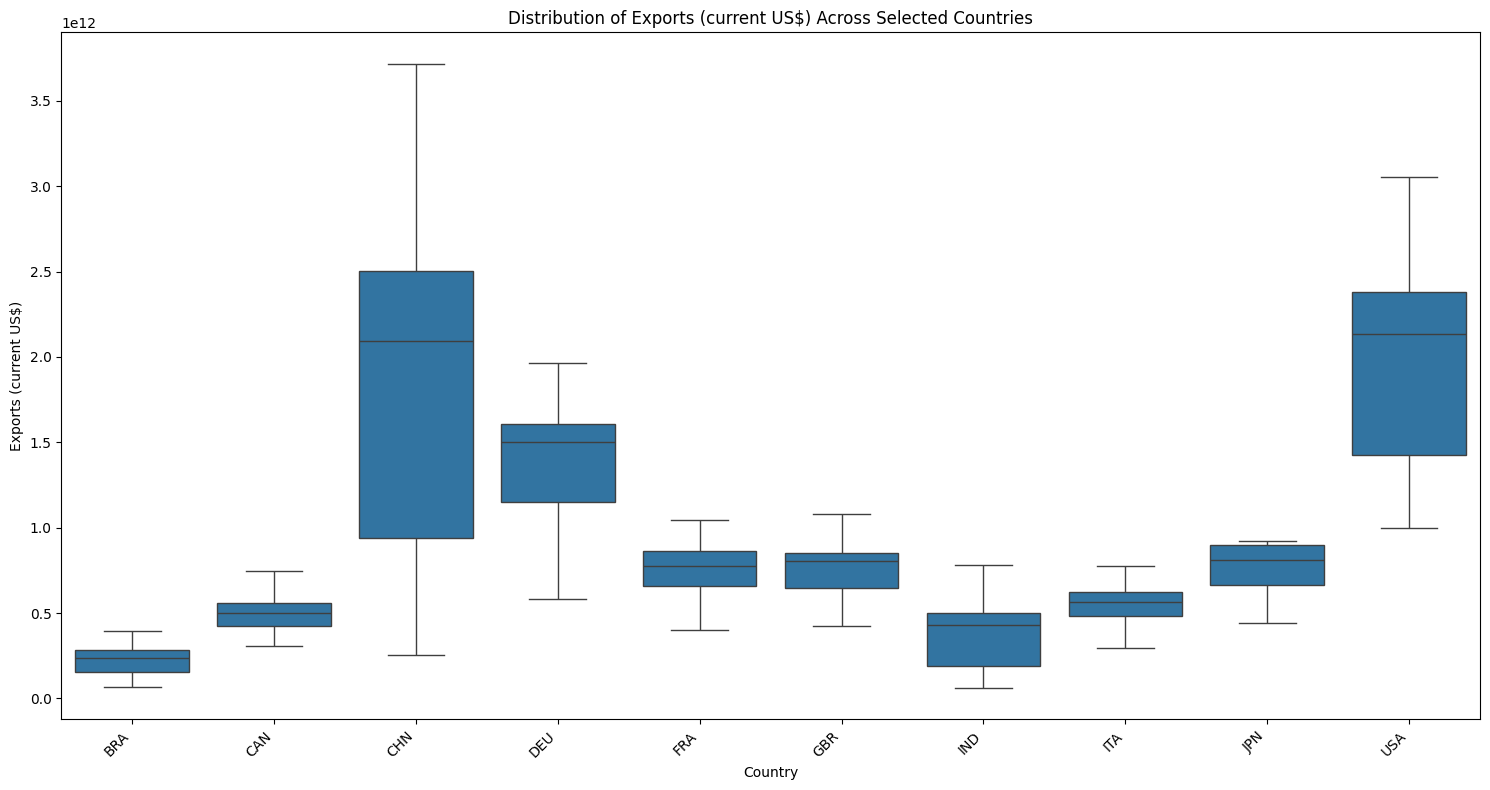

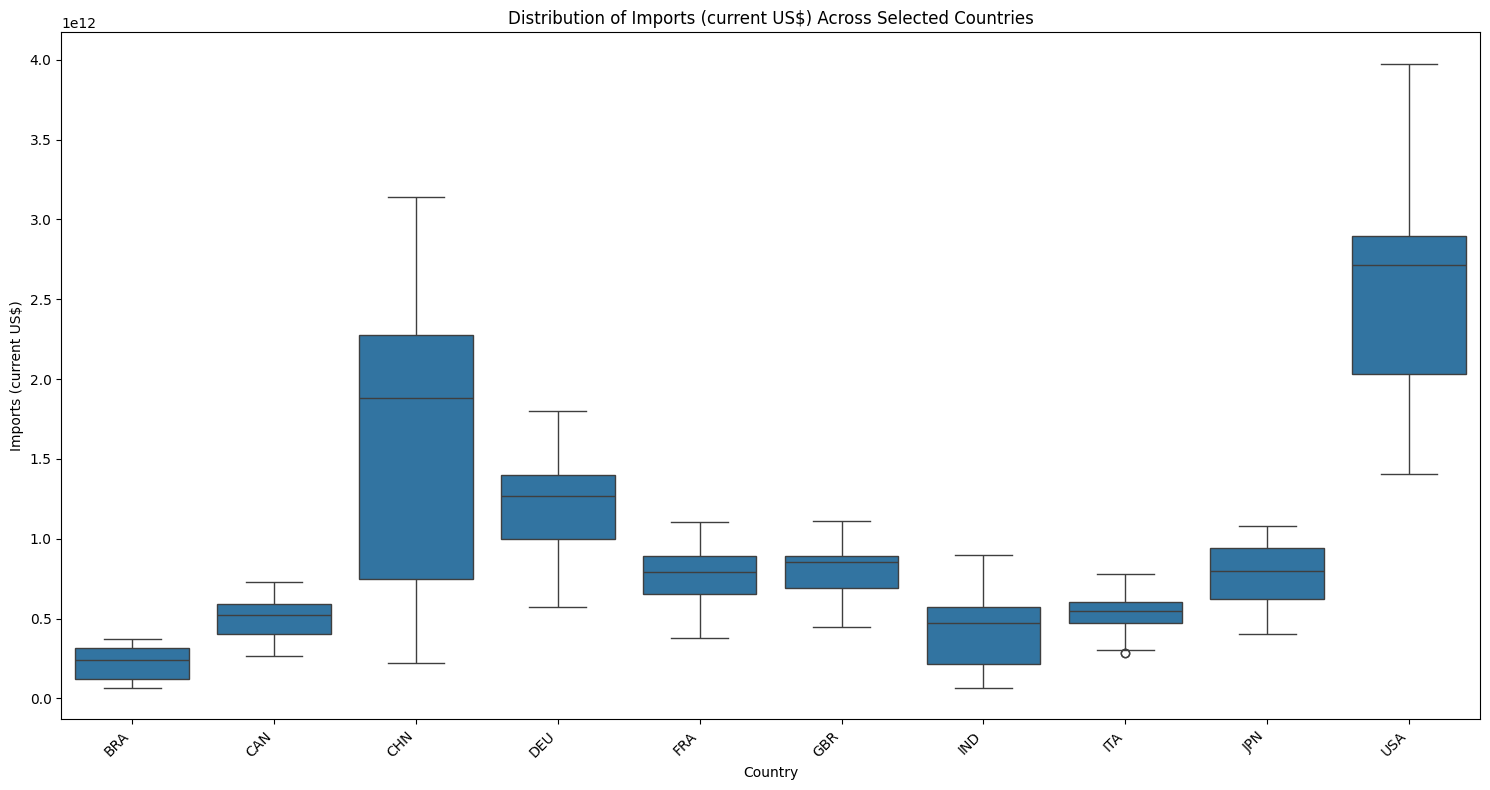

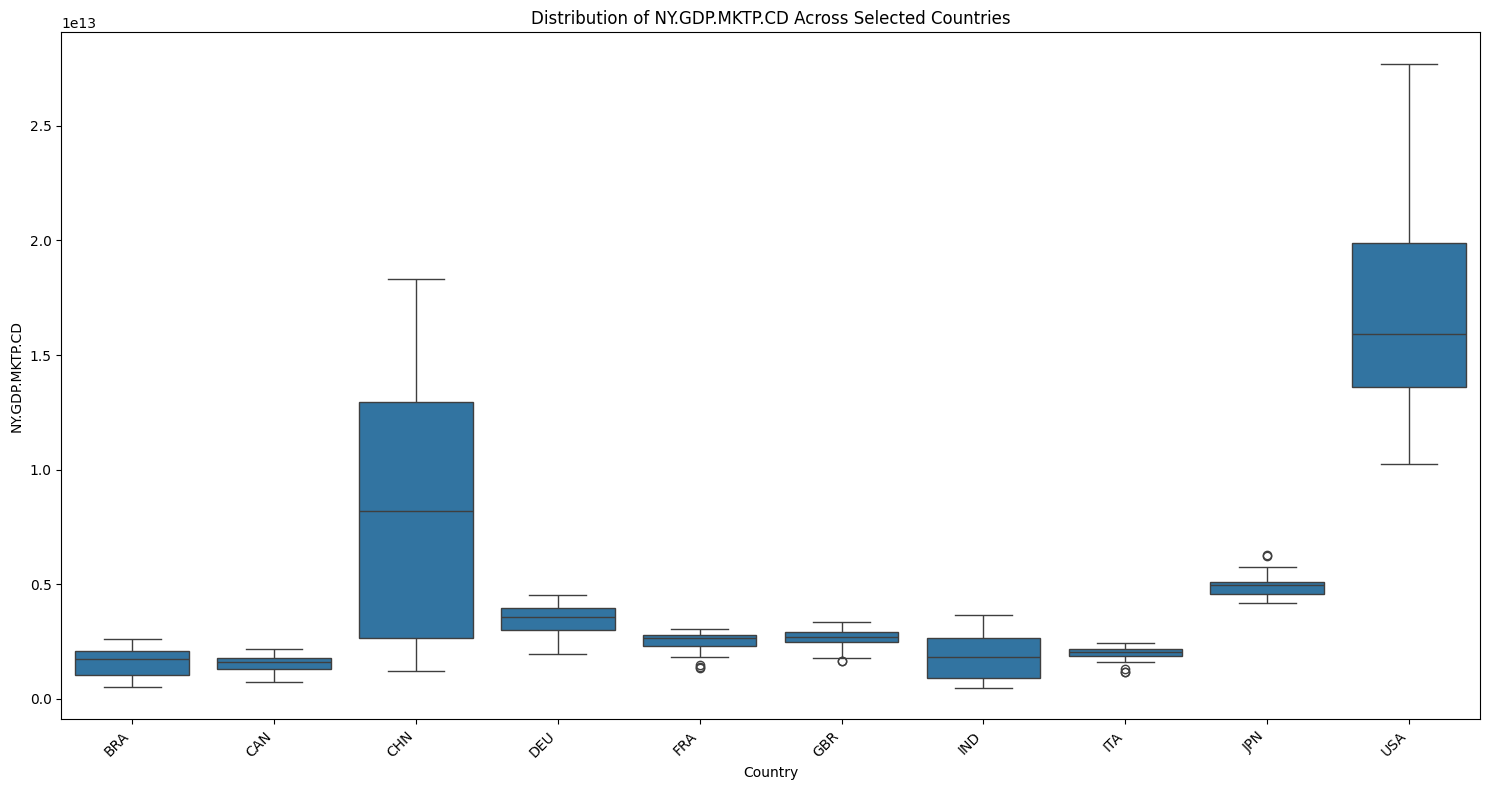

In [28]:
# Select a subset of key numeric indicators for comparison
selected_indicators_compare = ['Exports (current US$)', 'Imports (current US$)', 'NY.GDP.MKTP.CD']

# Select a reasonable number of countries for comparison
countries_to_compare = ['USA', 'CHN', 'JPN', 'DEU', 'IND', 'GBR', 'FRA', 'ITA', 'CAN', 'BRA']

# Filter the imputed dataframe to include only the selected countries
df_compare = df_imputed[df_imputed['Country'].isin(countries_to_compare)]

# Iterate through selected indicators and create box plots
print("Generating box plots to compare distributions across countries:")
for indicator in selected_indicators_compare:
    if indicator in df_compare.columns:
        plt.figure(figsize=(15, 8))
        sns.boxplot(x='Country', y=indicator, data=df_compare)
        plt.title(f'Distribution of {indicator} Across Selected Countries')
        plt.xlabel('Country')
        plt.ylabel(indicator)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Indicator '{indicator}' not found in the dataframe.")


The box plots compare the distribution of 'Exports (current US$)', 'Imports (current US$)', and 'NY.GDP.MKTP.CD' across a selection of countries.

- They clearly show the large disparities in economic scale across countries, with major economies exhibiting significantly higher median values and wider ranges for these indicators. we can also observe there are outliers in these plots which are consistent with the skewed distributions.

Calculated and visualized the Pearson and Spearman correlation matrices for the numeric columns to understand linear and non-linear relationships.



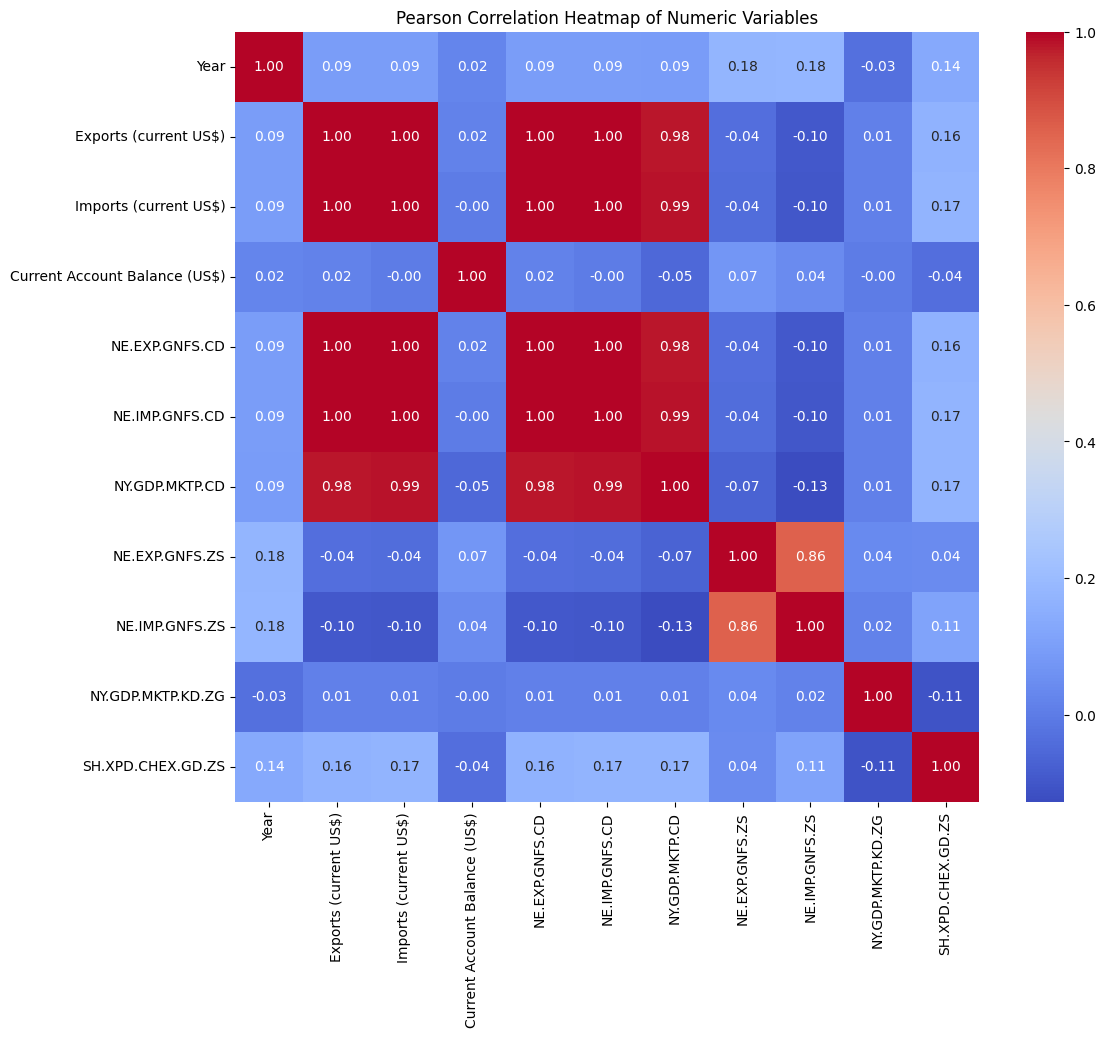

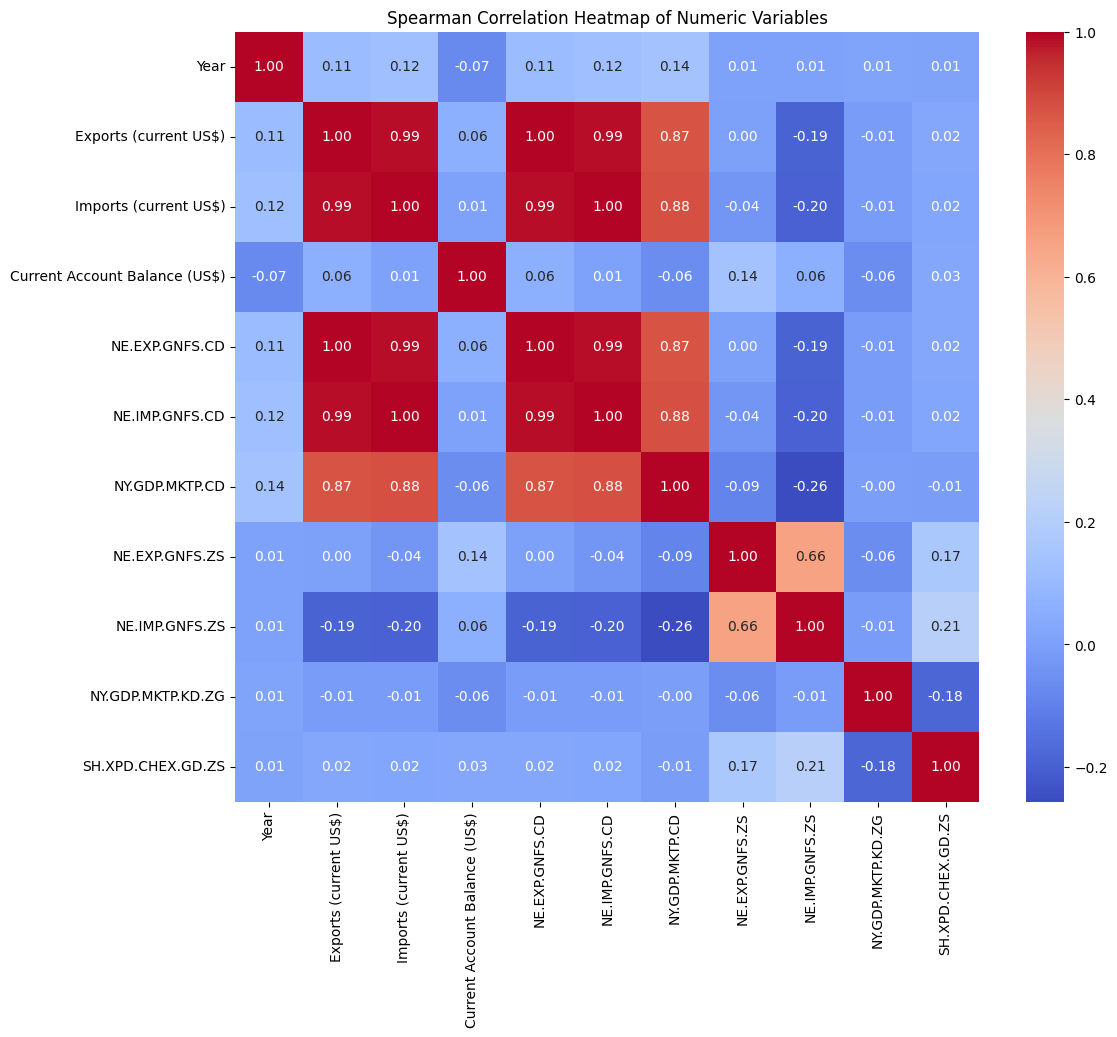

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numeric columns from the df_imputed DataFrame
numeric_cols_corr = [c for c in df_imputed.columns if pd.api.types.is_numeric_dtype(df_imputed[c])]

# Pearson correlation matrix
pearson_corr = df_imputed[numeric_cols_corr].corr(method='pearson')

# heatmap for Pearson correlation
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap of Numeric Variables')
plt.show()

# Spearman correlation matrix
spearman_corr = df_imputed[numeric_cols_corr].corr(method='spearman')

# heatmap for Spearman correlation
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap of Numeric Variables')
plt.show()

These heatmaps visualizes the Pearson (linear) and Spearman (rank-based) correlation matrices for the numeric columns.

- Both heatmaps show strong positive correlations between the absolute economic indicators (Exports, Imports, GDP), indicating that these variables tend to increase together. The Spearman correlations are slightly lower but still high. The correlations with percentage-based indicators and GDP growth rate are weaker.

Created bar plots for categorical variables to show the frequency of each category.



Visualizing counts of categorical columns:


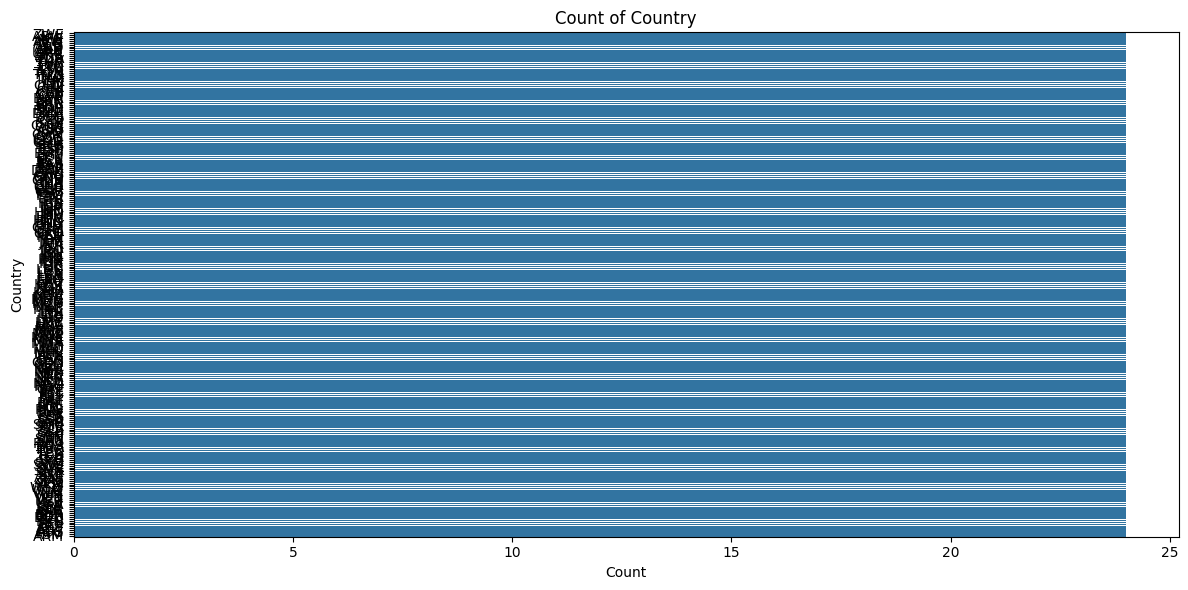

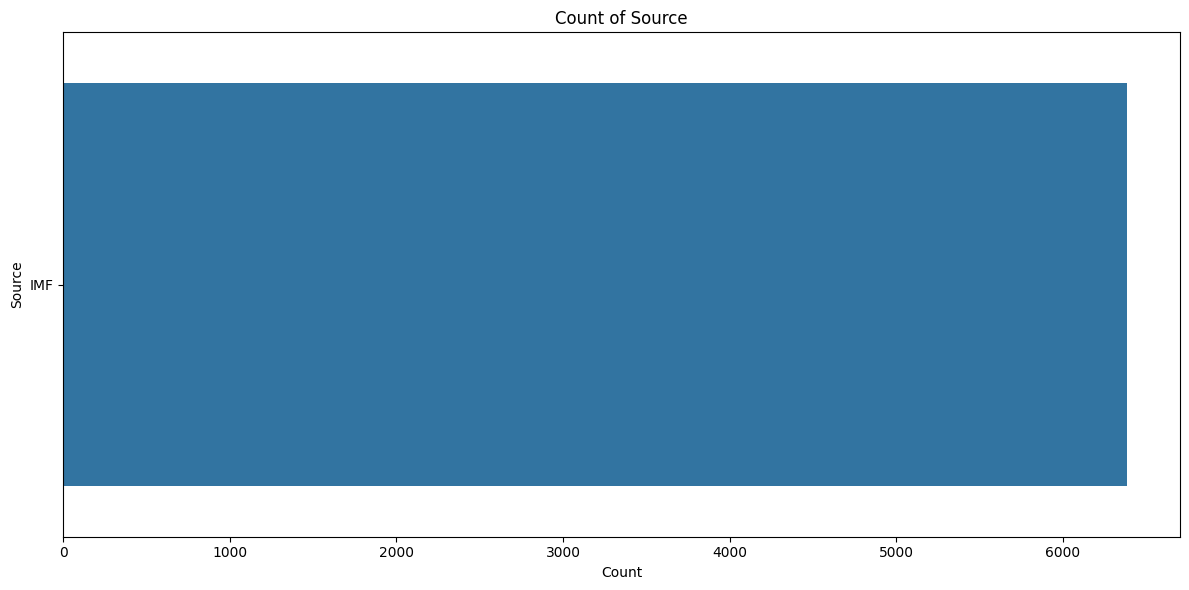

In [30]:
# Select the categorical columns from the df_imputed DataFrame.
# Use the categorical columns detected earlier after imputation
categorical_cols_imputed = [c for c in df_imputed.columns if c in cat_cols_post]

print("\nVisualizing counts of categorical columns:")
# Iterate through the selected categorical columns.
for col in categorical_cols_imputed:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_imputed, y=col, order=df_imputed[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    plt.close()


These bar plots show the frequency of each category in the Country and Source columns.

The Country plot shows that data is available for a large number of countries, with a relatively even distribution across most with some have more years of data than others. The Source    plot confirms that all data originates from the IMF.


Generated line plots comparing export and import values over time for specific countries or aggregated data.


Generating line plots for Exports and Imports over time for selected countries:


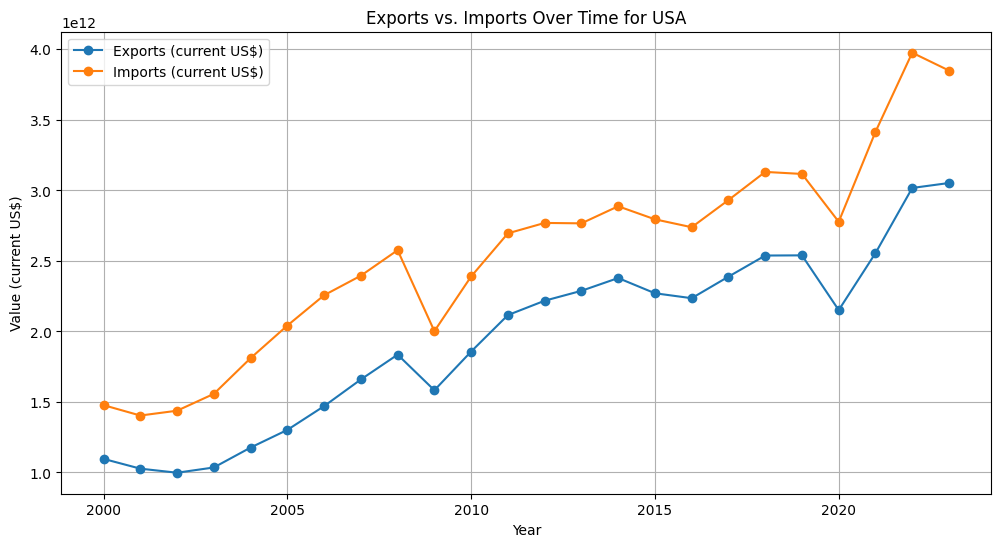

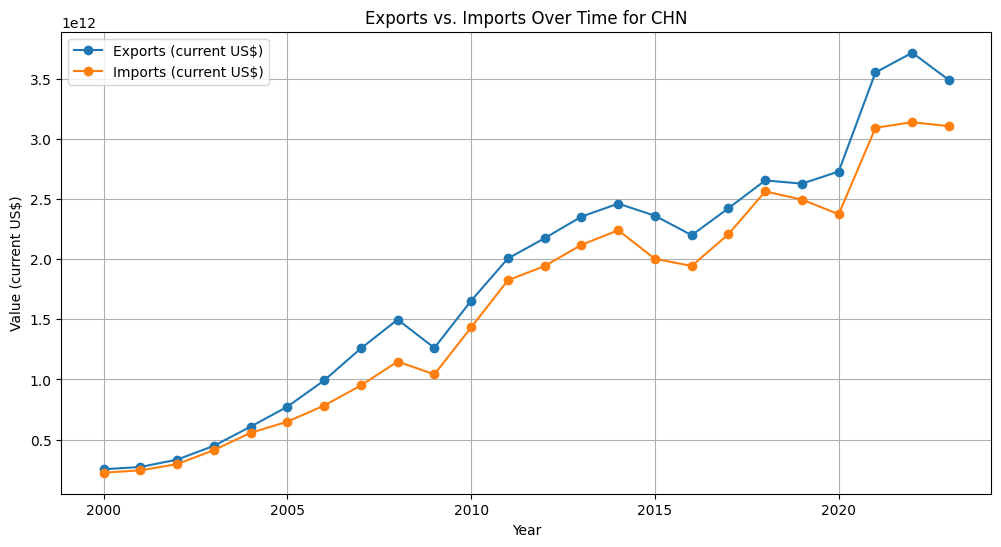

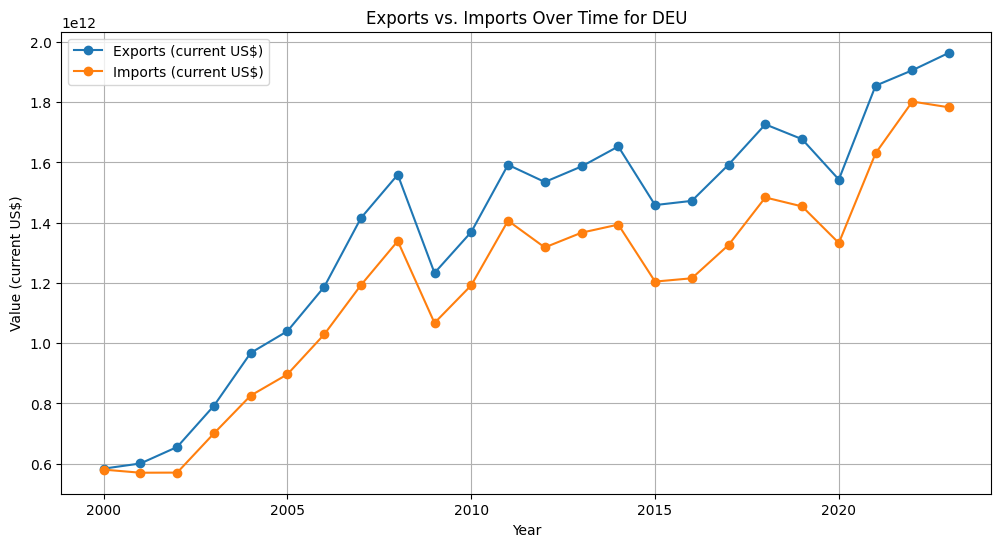

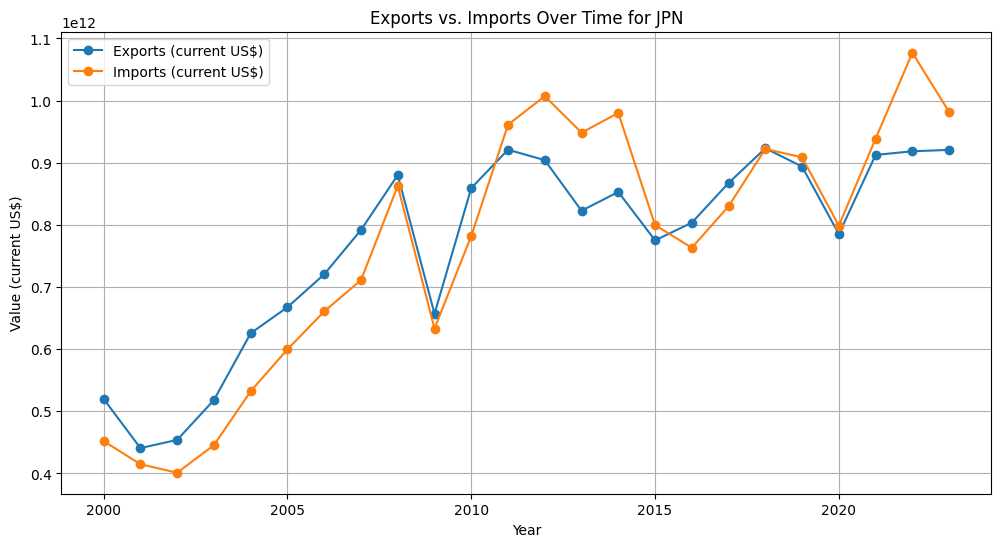

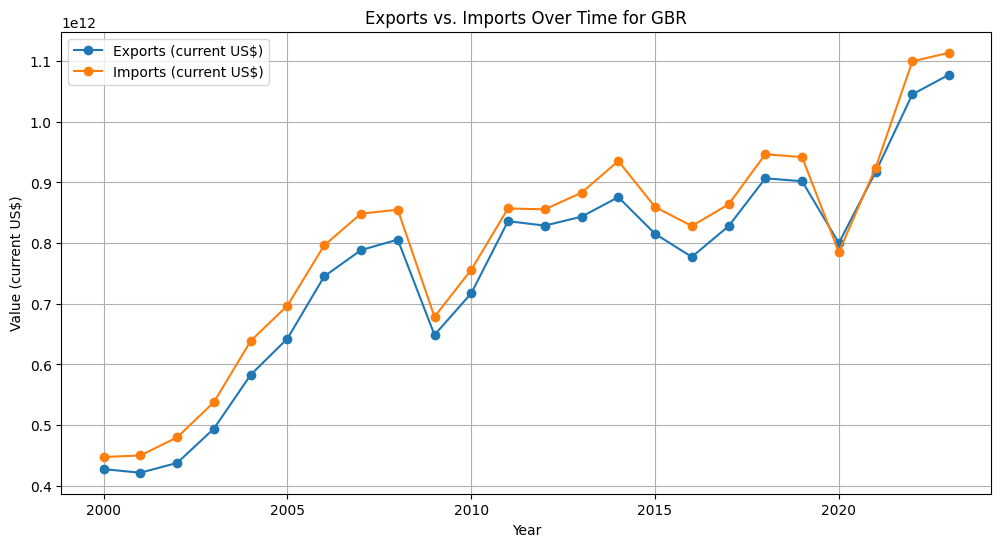

In [31]:
# 1. Select few countries
selected_countries_trade = ['USA', 'CHN', 'DEU', 'JPN', 'GBR'] # Selecting a few major economies

# 2. Filter the df_imputed DataFrame to include data for selected countries
df_filtered_countries = df_imputed[df_imputed['Country'].isin(selected_countries_trade)].copy()

df_filtered_countries['Year'] = pd.to_numeric(df_filtered_countries['Year'])

# 3. For each selected country, create a line plot
print("Generating line plots for Exports and Imports over time for selected countries:")

for country in selected_countries_trade:
    df_country_trade = df_filtered_countries[df_filtered_countries['Country'] == country]

    if not df_country_trade.empty:
        plt.figure(figsize=(12, 6))
        plt.plot(df_country_trade['Year'], df_country_trade['Exports (current US$)'], marker='o', linestyle='-', label='Exports (current US$)')
        plt.plot(df_country_trade['Year'], df_country_trade['Imports (current US$)'], marker='o', linestyle='-', label='Imports (current US$)')
        plt.title(f'Exports vs. Imports Over Time for {country}')
        plt.xlabel('Year')
        plt.ylabel('Value (current US$)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {country} in the filtered DataFrame.")


These line plots compare the trends of 'Exports (current US$)' and 'Imports (current US$') over time for selected countries.

 The plot show that for most major economies, exports and imports tend to follow similar patterns and grow together over time. The gap between exports and imports indicates the trade balance for each country over the years.

Created a histogram with a KDE overlay for the GDP growth rate column to visualize its distribution.



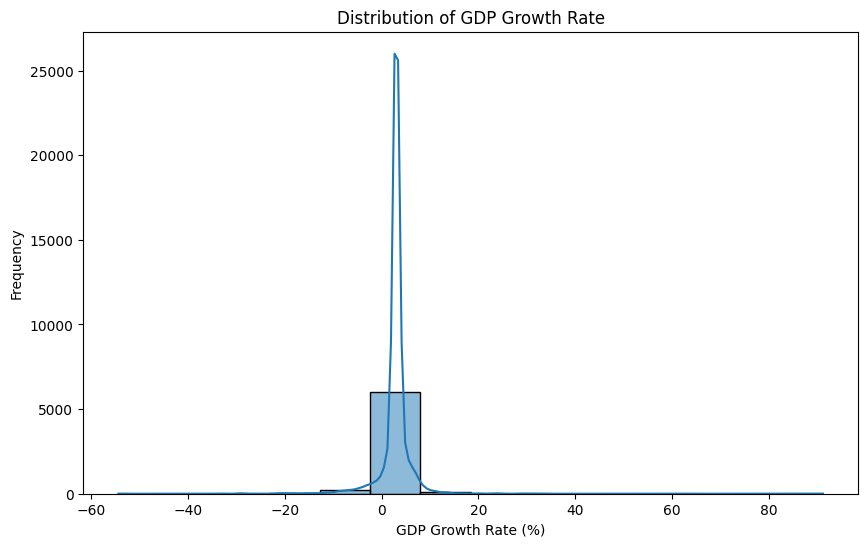

In [32]:
plt.figure(figsize=(10, 6))

sns.histplot(df_imputed['NY.GDP.MKTP.KD.ZG'], kde=True)
plt.title('Distribution of GDP Growth Rate')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

This histogram with a Kernel Density Estimate (KDE) visualizes the distribution of the GDP growth rate (`NY.GDP.MKTP.KD.ZG`).

It shows that the growth rates are mostly centered around positive values, indicating overall economic expansion during the period covered by the dataset, but we can see there is a spread with instances of negative growth and higher growth spurts.


Visualized the trend of health expenditure over time by calculating the mean per year and plotting a line graph.



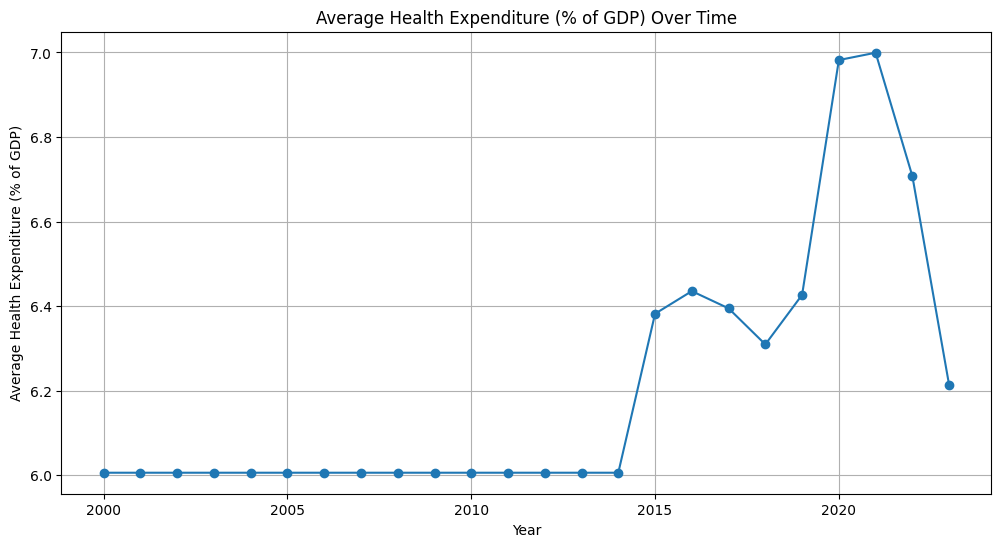

In [33]:
health_expenditure_trend = df_imputed[['Year', 'SH.XPD.CHEX.GD.ZS']].groupby('Year')['SH.XPD.CHEX.GD.ZS'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(health_expenditure_trend['Year'], health_expenditure_trend['SH.XPD.CHEX.GD.ZS'], marker='o', linestyle='-')
plt.title('Average Health Expenditure (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('Average Health Expenditure (% of GDP)')
plt.grid(True)
plt.show()
plt.close()


This line plot shows the trend of the average health expenditure as a percentage of GDP (`SH.XPD.CHEX.GD.ZS`) across all countries over time.

It suggests a general upward trend in health expenditure as a proportion of GDP over the years.


Generated a scatter plot to visualize the relationship between GDP (`NY.GDP.MKTP.CD`) and Exports (`Exports (current US$)`) across all countries and years in the dataset.

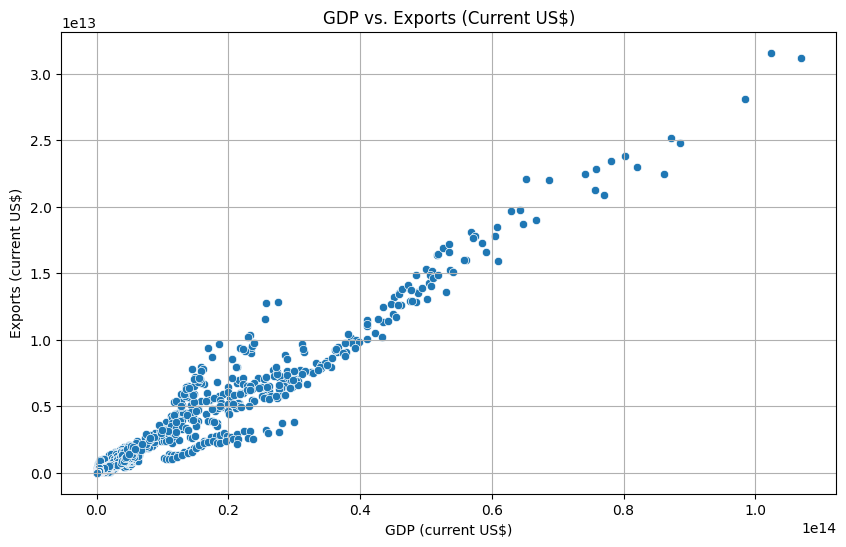

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_imputed, x='NY.GDP.MKTP.CD', y='Exports (current US$)')
plt.title('GDP vs. Exports (Current US$)')
plt.xlabel('GDP (current US$)')
plt.ylabel('Exports (current US$)')
plt.grid(True)
plt.show()


This scatter plot visualizes the relationship between GDP (`NY.GDP.MKTP.CD`) and Exports (`Exports (current US$)`) across all countries and years in the dataset.

This plot shows a strong positive correlation between GDP and Exports. As GDP increases, Exports generally also increase. From this we can understand that larger economies tend to have higher export values.